<a href="https://colab.research.google.com/github/viviindahf/RevoBank-Promo-Sensitivity-Customer-Segmentation/blob/main/%5BW6W7W8%5D_Vivi_Indah_Fitriani_RevoBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## A. Business Requirement and Objective

**Business Background**

- RevoBank is European bank that provides credit cards to its customers. Over the past 6 months, RevoBank have new promotion for transactions in RevoShop
- Every eligible transactions, redeem a voucher and get 15 reward points (= 1.5 euro)
- At the same time, bank earns 2.4% margin from total transaction amounts.

**Business Objectives**

- Review promotion program performance and reduce the cost of the promotion.
- Identify segments of RevoBank credit card users who are RevoShop shoppers
- Identify business opportunities to customize the rewards program in order to reduce the cost of promotion.

####**Dataset:**
* https://drive.google.com/file/d/1l-sg91hd2ZLiFzGV2yZY8jJ3v-ksGPJe/view

####**Data Dictionary:**
* https://docs.google.com/spreadsheets/d/1-rHnt65_3MSINBv14I1TwSaRV9xGwDY11HNkaiFOdgo/edit#gid=0

# B.Data Preparation

## Import Library

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime # Untuk mengolah data tanggal & waktu
import seaborn as sns # Data visualization
from sklearn.cluster import KMeans # K-means clustering
from yellowbrick.cluster import SilhouetteVisualizer # Untuk melakukan analisis siluet untuk k-means clustering

## Load the Dataset

In [ ]:
df= pd.read_csv('bank_promotion_analysis.csv')
df.head(10)

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.000,201.000,200.000,250.000,5.000,21.000,2.000,...,A,X,0.000,90587.000,59785.000,32.000,123.000,1.000,0.000,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.300,114.100,140.000,150.000,3.000,22.000,2.000,...,A,X,0.000,65814.000,32597.000,34.000,109.000,1.000,0.000,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.300,242.700,400.000,290.000,4.000,12.000,2.000,...,A,X,0.000,42583.000,0.000,1.000,89.000,0.000,0.000,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.600,210.000,242.900,300.000,8.000,27.000,6.000,...,A,X,0.000,61176.000,0.000,0.000,86.000,1.000,1.000,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.000,77.500,97.500,90.000,5.000,44.000,4.000,...,A,X,0.000,44525.000,42253.000,22.000,124.000,1.000,0.000,1989-10-21
5,100000024,5262-MARKETPLACES,REVOSH MKTPLC,120.000,101.300,122.000,100.000,7.000,22.000,4.000,...,A,X,1.000,108211.000,56465.000,0.000,78.000,0.000,1.000,1987-10-21
6,100000027,5262-MARKETPLACES,REVOSH MKTPLC,213.800,166.500,226.300,150.000,13.000,46.000,8.000,...,A,X,0.000,51401.000,47979.000,0.000,69.000,1.000,1.000,1979-05-11
7,100000028,5262-MARKETPLACES,REVOSH MKTPLC,195.200,134.600,205.000,150.000,6.000,22.000,1.000,...,A,X,0.000,88296.000,0.000,0.000,67.000,1.000,1.000,1973-09-26
8,100000030,5262-MARKETPLACES,REVOSH MKTPLC,108.600,65.700,110.000,120.000,7.000,30.000,5.000,...,A,X,0.000,63998.000,0.000,0.000,68.000,1.000,0.000,1978-10-26
9,100000031,5262-MARKETPLACES,REVOSH MKTPLC,250.000,206.200,250.000,250.000,3.000,13.000,1.000,...,A,X,1.000,140711.000,72703.000,0.000,101.000,1.000,0.000,1976-04-12


# C.Data Cleaning and Preparation

Steps to do :
* Unique Values (Remove irrelevant values)
* Treating missing values (state the reasoning)
* Check Duplicates, retain only the first record
* Check data & convert data types
* Check Outliers



### Diagnostics

We will first do our data cleaning diagnostics and then create new copy of the cleaned data.

In [ ]:
#Make a copy of the original data for data cleaning
df = df.copy()

## Check Data Type

In [ ]:
df.shape #Check how much rows and columns

(112634, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             112634 non-null  int64  
 1   MCC                    112634 non-null  object 
 2   MERCHANT_NAME          112634 non-null  object 
 3   AVG_TXN_AMT_L6M        112634 non-null  float64
 4   AVG_TXN_AMT_LTM        112634 non-null  float64
 5   AVG_PROMO_TXN_AMT_L6M  112634 non-null  float64
 6   AVG_PROMO_TXN_AMT_LTM  112634 non-null  float64
 7   TXN_CNT_L6M            112634 non-null  float64
 8   TXN_CNT_LTM            112634 non-null  float64
 9   PROMO_TXN_CNT_L6M      112634 non-null  float64
 10  PROMO_TXN_CNT_LTM      112634 non-null  float64
 11  LAST_TXN_DAY           112634 non-null  float64
 12  CNT_PROMO_L6M          112634 non-null  float64
 13  CNT_PROMO_L12M         112634 non-null  float64
 14  CUST_VALUE_GROUP       112634 non-nu

Insight :
* ACCOUNT_ID column can be changed into str
* BIRTH_DATE column can be changed into datetime

In [ ]:
# Check Null Data
df.isnull().sum()

ACCOUNT_ID               0
MCC                      0
MERCHANT_NAME            0
AVG_TXN_AMT_L6M          0
AVG_TXN_AMT_LTM          0
AVG_PROMO_TXN_AMT_L6M    0
AVG_PROMO_TXN_AMT_LTM    0
TXN_CNT_L6M              0
TXN_CNT_LTM              0
PROMO_TXN_CNT_L6M        0
PROMO_TXN_CNT_LTM        0
LAST_TXN_DAY             0
CNT_PROMO_L6M            0
CNT_PROMO_L12M           0
CUST_VALUE_GROUP         0
MAPP_ACTIVE_GROUP        0
HOMEOWNER_STATUS         0
HOME_VALUE               0
PROXY_INCOME             0
PCT_INCOME_RETIREMENT    0
MOB                      0
FLAG_FEMALE              0
PROMO_CHANNEL            0
BIRTH_DATE               0
dtype: int64

### Change Datatype

In [ ]:
#Change ACCOUNT_ID column into str
df['ACCOUNT_ID'] = df['ACCOUNT_ID'].astype(str)

In [ ]:
# Ubah kolom BIRTH_DATE menjadi format datetime
df['BIRTH_DATE'] = pd.to_datetime(df['BIRTH_DATE'])
df

In [ ]:
# Convert 'LAST_TXN_DAY' to integer
df['LAST_TXN_DAY'] = df['LAST_TXN_DAY'].astype(int)
df['MOB'] = df['MOB'].astype(int)

# Convert 'FLAG_FEMALE' and 'PROMO_CHANNEL' to integer (assuming they contain '0' or '1')
df['FLAG_FEMALE'] = df['FLAG_FEMALE'].astype(int)
df['PROMO_CHANNEL'] = df['PROMO_CHANNEL'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             112634 non-null  object        
 1   MCC                    112634 non-null  object        
 2   MERCHANT_NAME          112634 non-null  object        
 3   AVG_TXN_AMT_L6M        112634 non-null  float64       
 4   AVG_TXN_AMT_LTM        112634 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  112634 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  112634 non-null  float64       
 7   TXN_CNT_L6M            112634 non-null  float64       
 8   TXN_CNT_LTM            112634 non-null  float64       
 9   PROMO_TXN_CNT_L6M      112634 non-null  float64       
 10  PROMO_TXN_CNT_LTM      112634 non-null  float64       
 11  LAST_TXN_DAY           112634 non-null  int64         
 12  CNT_PROMO_L6M          112634 non-null  floa

### Check For Unique Value and Typos

In [ ]:
df.columns

Index(['ACCOUNT_ID', 'MCC', 'MERCHANT_NAME', 'AVG_TXN_AMT_L6M',
       'AVG_TXN_AMT_LTM', 'AVG_PROMO_TXN_AMT_L6M', 'AVG_PROMO_TXN_AMT_LTM',
       'TXN_CNT_L6M', 'TXN_CNT_LTM', 'PROMO_TXN_CNT_L6M', 'PROMO_TXN_CNT_LTM',
       'LAST_TXN_DAY', 'CNT_PROMO_L6M', 'CNT_PROMO_L12M', 'CUST_VALUE_GROUP',
       'MAPP_ACTIVE_GROUP', 'HOMEOWNER_STATUS', 'HOME_VALUE', 'PROXY_INCOME',
       'PCT_INCOME_RETIREMENT', 'MOB', 'FLAG_FEMALE', 'PROMO_CHANNEL',
       'BIRTH_DATE'],
      dtype='object')

In [ ]:
#check ACCOUNT_ID column unique value
df['ACCOUNT_ID'].unique()

array(['100000004', '100000008', '100000012', ..., '101059860',
       '101059866', '101059869'], dtype=object)

In [ ]:
#Check total Unique Value in id
df['ACCOUNT_ID'].nunique()

112433

Insight:

- There is no typo in dataset
- Account_ID has 112433 unique value

In [ ]:
df['MCC'].value_counts()

5262-MARKETPLACES         112633
5311-DEPARTMENT STORES         1
Name: MCC, dtype: int64

In [ ]:
df['MERCHANT_NAME'].value_counts()

REVOSHOP           91168
REVOSH MKTPLC      19965
TOKTOKLIVE          1500
EL CORTE INGLES        1
Name: MERCHANT_NAME, dtype: int64

Recommendation:
- Because there's no Department Stores defined in the data dictionary, so we have to remove the value
- Remove TOKTOKLIVE and EL CORTE INGLES since it's not in the data dictionary

## Exclude Column

In [ ]:
#Exclude 5311-DEPARTEMENT STORES (other way to drop/exclude values)
df = df[df['MCC']!="5311-DEPARTMENT STORES"]

In [ ]:
#To confirm the changes
df['MCC'].value_counts()

5262-MARKETPLACES    112633
Name: MCC, dtype: int64

In [ ]:
#Exclude TOKTOKLIVE in MERCHANT NAME column (other way to drop/exclude values)
df = df[df['MERCHANT_NAME']!="TOKTOKLIVE"]

In [ ]:
#Exclude EL CORTE INGLES (other way to drop/exclude values)
df = df[df['MERCHANT_NAME']!="EL CORTE INGLES"]

In [ ]:
len(df)

111133

In [ ]:
#To confirm the changes
df['MERCHANT_NAME'].value_counts()

REVOSHOP         91168
REVOSH MKTPLC    19965
Name: MERCHANT_NAME, dtype: int64

## Remove Duplicated Data

In [ ]:
#Check the duplicate data in the ACCOUNT_ID column
df[df['ACCOUNT_ID'].duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


INSIGHT:
- There are 201 duplicated data in the ACCOUNT_ID column

In [ ]:
#Remove Duplicate in ACC_ID
df.drop_duplicates(subset='ACCOUNT_ID', keep='first', inplace = True)

In [ ]:
len(df)

111133

## Remove Irrelevant Row

In [ ]:
df['PROMO_CHANNEL'].value_counts()

0    77750
1    33383
Name: PROMO_CHANNEL, dtype: int64

In [ ]:
#Delete -1 value in AVG_PROMO_TXN_AMT_L6M column
df = df[df['AVG_PROMO_TXN_AMT_L6M']!= -1]

In [ ]:
len(df)

107658

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  object        
 1   MCC                    107658 non-null  object        
 2   MERCHANT_NAME          107658 non-null  object        
 3   AVG_TXN_AMT_L6M        107658 non-null  float64       
 4   AVG_TXN_AMT_LTM        107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 7   TXN_CNT_L6M            107658 non-null  float64       
 8   TXN_CNT_LTM            107658 non-null  float64       
 9   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 10  PROMO_TXN_CNT_LTM      107658 non-null  float64       
 11  LAST_TXN_DAY           107658 non-null  int64         
 12  CNT_PROMO_L6M          107658 non-null  floa

Insight:
- Value who have -1 has been deleted
- There's no typo in the dataset
- Total data after cleaning is 107558


# RevoBank Clean Data

In [ ]:
df_clean = df.copy() #Create a copy after cleaning for other purpose, and its easier if there is something forgoten and needed to be clean later
df_clean.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.000,201.000,200.000,250.000,5.000,21.000,2.000,...,A,X,0.000,90587.000,59785.000,32.000,123,1,0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.300,114.100,140.000,150.000,3.000,22.000,2.000,...,A,X,0.000,65814.000,32597.000,34.000,109,1,0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.300,242.700,400.000,290.000,4.000,12.000,2.000,...,A,X,0.000,42583.000,0.000,1.000,89,0,0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.600,210.000,242.900,300.000,8.000,27.000,6.000,...,A,X,0.000,61176.000,0.000,0.000,86,1,1,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.000,77.500,97.500,90.000,5.000,44.000,4.000,...,A,X,0.000,44525.000,42253.000,22.000,124,1,0,1989-10-21


# Checking Outliers

<Axes: xlabel='AVG_PROMO_TXN_AMT_L6M'>

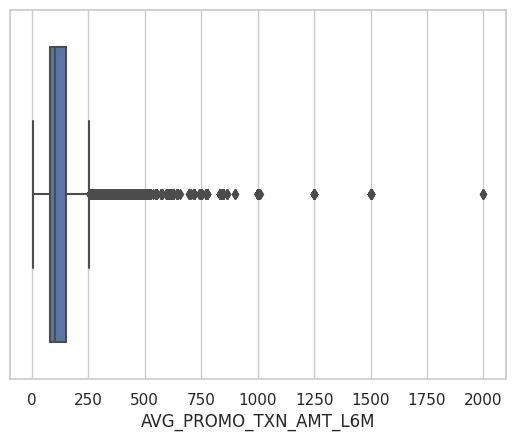

In [ ]:
#Cheking the data distribution of the df_merged data for annual_inc
sns.boxplot(data = df , x ="AVG_PROMO_TXN_AMT_L6M")

# EDA


In [ ]:
#Preparing a copy of df_clean for EDA
df_eda = df_clean.copy()
df_eda.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.000,201.000,200.000,250.000,5.000,21.000,2.000,...,A,X,0.000,90587.000,59785.000,32.000,123,1,0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.300,114.100,140.000,150.000,3.000,22.000,2.000,...,A,X,0.000,65814.000,32597.000,34.000,109,1,0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.300,242.700,400.000,290.000,4.000,12.000,2.000,...,A,X,0.000,42583.000,0.000,1.000,89,0,0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.600,210.000,242.900,300.000,8.000,27.000,6.000,...,A,X,0.000,61176.000,0.000,0.000,86,1,1,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.000,77.500,97.500,90.000,5.000,44.000,4.000,...,A,X,0.000,44525.000,42253.000,22.000,124,1,0,1989-10-21


In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  object        
 1   MCC                    107658 non-null  object        
 2   MERCHANT_NAME          107658 non-null  object        
 3   AVG_TXN_AMT_L6M        107658 non-null  float64       
 4   AVG_TXN_AMT_LTM        107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 7   TXN_CNT_L6M            107658 non-null  float64       
 8   TXN_CNT_LTM            107658 non-null  float64       
 9   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 10  PROMO_TXN_CNT_LTM      107658 non-null  float64       
 11  LAST_TXN_DAY           107658 non-null  int64         
 12  CNT_PROMO_L6M          107658 non-null  floa

In [ ]:
# 1: Calculate total sales for each customer in the past 6 months
df_eda['TOTAL_SALES_L6M'] = df_eda['AVG_TXN_AMT_L6M']*df_eda['TXN_CNT_L6M']

# 2: Calculate total sales for each customer in the lifetime sales
df_eda['TOTAL_SALES_LTM'] = df_eda['AVG_TXN_AMT_L6M']*df_eda['TXN_CNT_LTM']

# 3: Calculate total sales attributed to promo for each customer in the past 6 months
df_eda['TOTAL_PROMO_SALES_L6M'] = df_eda['AVG_PROMO_TXN_AMT_L6M']/ df_eda['PROMO_TXN_CNT_L6M']

# 4: Calculate total sales attributed to promo for each customer in the lifetime sales
df_eda['TOTAL_PROMO_SALES_LTM'] = df_eda['AVG_PROMO_TXN_AMT_LTM']/ df_eda['PROMO_TXN_CNT_LTM']

# 5: Calculate the percentage of total sales attributed to promo for each customer in the past 6 months
df_eda['PCT_PROMO_SALES_L6M'] = (df_eda['TOTAL_PROMO_SALES_L6M'] / df_eda['TOTAL_SALES_L6M']) * 100

# 6: Calculate the percentage of total sales attributed to promo for each customer in the past 6 months
df_eda['PCT_PROMO_SALES_LTM'] = (df_eda['TOTAL_PROMO_SALES_LTM'] / df_eda['TOTAL_SALES_LTM']) * 100

# 7: Identify promo-sensitive customers
df_eda['PROMO_SENSITIVE_L6M'] = df_eda['PCT_PROMO_SALES_L6M'] > 50 *100

# Convert boolean values (True/False) to 1/0
df_eda['PROMO_SENSITIVE_L6M'] = df_eda['PROMO_SENSITIVE_L6M'].astype(int)

# Now, the 'PROMO_SENSITIVE' column will have 1 for promo-sensitive customers and 0 for others.
df_eda

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,TOTAL_SALES_L6M,TOTAL_SALES_LTM,TOTAL_PROMO_SALES_L6M,TOTAL_PROMO_SALES_LTM,PCT_PROMO_SALES_L6M,PCT_PROMO_SALES_LTM,PROMO_SENSITIVE_L6M
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.000,201.000,200.000,250.000,5.000,21.000,2.000,...,1,0,1975-12-17,1080.000,4536.000,100.000,35.714,9.259,0.787,0
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.300,114.100,140.000,150.000,3.000,22.000,2.000,...,1,0,1991-12-27,429.900,3152.600,70.000,15.000,16.283,0.476,0
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.300,242.700,400.000,290.000,4.000,12.000,2.000,...,0,0,1970-03-22,1053.200,3159.600,200.000,72.500,18.990,2.295,0
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.600,210.000,242.900,300.000,8.000,27.000,6.000,...,1,1,1983-11-26,1884.800,6361.200,40.483,23.077,2.148,0.363,0
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.000,77.500,97.500,90.000,5.000,44.000,4.000,...,1,0,1989-10-21,490.000,4312.000,24.375,4.286,4.974,0.099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.000,84.200,100.000,100.000,2.000,12.000,2.000,...,0,1,1979-05-24,200.000,1200.000,50.000,20.000,25.000,1.667,0
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.000,113.400,120.000,200.000,3.000,22.000,1.000,...,0,0,1993-07-14,360.000,2640.000,120.000,40.000,33.333,1.515,0
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.900,36.800,46.700,70.000,7.000,28.000,3.000,...,0,1,1980-02-19,370.300,1481.200,15.567,5.833,4.204,0.394,0
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.000,147.300,190.000,200.000,3.000,23.000,2.000,...,1,0,1986-12-29,585.000,4485.000,95.000,20.000,16.239,0.446,0


## Descriptive Analysis
1. How many RevoShop customers do we have in the data?
2. What are the customer demographics in the dataset?
3. How much total sales have been generated in RevoShop over the past 6 months?
4. How many sales were made in response to the promo in the last 6 months?
5. What percentage of total sales at RevoShop is attributed to the promo?
6. What is the average number of transaction per customer in their lifetime and over the past 6 months?
7. What is the total cost of the promotion over the past 6 months?
8. What is the total revenue generared by the promo in the past 6 months?
9. How many customers are considered promo-sensitive?


In [ ]:
#Descriptive analysis after treating the outlier
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Define the list of numerical columns
numeric = ['AVG_TXN_AMT_L6M', 'AVG_TXN_AMT_LTM', 'AVG_PROMO_TXN_AMT_L6M', 'AVG_PROMO_TXN_AMT_LTM', 'TXN_CNT_L6M', 'TXN_CNT_LTM',
           'PROMO_TXN_CNT_L6M', 'PROMO_TXN_CNT_LTM', 'LAST_TXN_DAY', 'CNT_PROMO_L6M', 'CNT_PROMO_L12M', 'HOMEOWNER_STATUS',
           'HOME_VALUE', 'PROXY_INCOME', 'PCT_INCOME_RETIREMENT', 'MOB', 'FLAG_FEMALE', 'PROMO_CHANNEL']

desc_eda = df_eda[numeric].describe()
desc_eda.loc['kurtosis'] = df_eda[numeric].kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = df_eda[numeric].skew() #show Skewness statistic
desc_eda.loc['variance'] = df_eda[numeric].var() #show variance statistic
desc_eda.round(2)

,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL
count,107658.000,107658.000,107658.000,107658.000,107658.000,107658.000,107658.000,107658.000,107658.000,107658.000,107658.000,107658.000,107658.000,107658.000,107658.000,107658.000,107658.000,107658.000
mean,126.800,106.820,125.700,119.820,4.520,20.160,2.820,10.370,18.300,5.740,14.380,0.530,88424.080,38105.520,31.010,101.200,0.590,0.300
std,79.820,75.280,80.370,76.640,2.310,8.960,1.710,4.400,4.150,1.410,5.980,0.500,71656.260,25934.630,12.050,25.650,0.490,0.460
min,11.500,17.300,3.200,3.200,1.000,3.000,1.000,1.000,2.000,0.000,1.000,0.000,0.000,0.000,0.000,21.000,0.000,0.000
25%,83.300,69.300,80.000,80.000,3.000,14.000,1.000,7.000,16.000,5.000,12.000,0.000,47297.000,24542.000,25.000,81.000,0.000,0.000
50%,108.000,92.600,104.300,100.000,4.000,18.000,2.000,10.000,18.000,6.000,13.000,1.000,66907.000,41904.000,31.000,105.000,1.000,0.000
75%,150.000,123.800,150.000,150.000,6.000,24.000,4.000,12.000,21.000,6.000,14.000,1.000,98231.000,53636.000,38.000,125.000,1.000,1.000
max,2000.000,3010.000,2000.000,2500.000,18.000,127.000,10.000,46.000,28.000,21.000,76.000,1.000,600050.000,200003.000,100.000,570.000,1.000,1.000
kurtosis,46.900,277.450,40.150,78.190,0.820,6.100,0.680,1.620,2.140,6.450,6.010,-1.990,11.230,0.230,1.350,1.950,-1.880,-1.240
skewness,4.390,10.510,4.130,5.210,0.910,1.870,1.030,1.060,-0.810,1.000,2.210,-0.110,2.850,0.060,-0.250,-0.290,-0.350,0.870


In [ ]:
objects = ['ACCOUNT_ID', 'MCC','MERCHANT_NAME', 'CUST_VALUE_GROUP', 'MAPP_ACTIVE_GROUP']
df_eda[objects].describe()

,ACCOUNT_ID,MCC,MERCHANT_NAME,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP
count,107658,107658,107658,107658,107658
unique,107658,1,2,5,3
top,100000004,5262-MARKETPLACES,REVOSHOP,E,X
freq,1,107658,88319,44537,100141


**Insight**:
1. There are **107,658** unique accounts in the dataset.
2. All transactions in the dataset belong to the same category, which is **5262-MARKETPLACES.**
3. There are 2 unique merchant names in the dataset namely REVOSHOP dan REVOMKTPLC. The most frequent merchant name is **REVOSHOP** appearing **88319 times.**
4. The top customer value group is **E**, which appears **44,537 times** while E is the lowest value customers)
5. The most status of account activity in the mobile app is **X** which appears **100141 times**, indicating a significant number of accounts with high activity in the mobile app.

### Descriptive Information about Datatype

In [ ]:
df_eda['BIRTH_DATE'].describe()

<ipython-input-349-1345bf105c81>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_eda['BIRTH_DATE'].describe()


count                  107658
unique                   6761
top       1982-09-21 00:00:00
freq                       57
first     1957-07-17 00:00:00
last      2005-09-20 00:00:00
Name: BIRTH_DATE, dtype: object

Insight :
The customers birth date range starts from **1956-03-18** to **2005-09-20**

### Number of Customer

In [ ]:
#Number of customer
total_customer = df_eda['ACCOUNT_ID'].count()
total_customer

107658

Insight :
* We have 107658 RevoShop customers who were born from 1956-2005

## Customer Demographics

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  object        
 1   MCC                    107658 non-null  object        
 2   MERCHANT_NAME          107658 non-null  object        
 3   AVG_TXN_AMT_L6M        107658 non-null  float64       
 4   AVG_TXN_AMT_LTM        107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 7   TXN_CNT_L6M            107658 non-null  float64       
 8   TXN_CNT_LTM            107658 non-null  float64       
 9   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 10  PROMO_TXN_CNT_LTM      107658 non-null  float64       
 11  LAST_TXN_DAY           107658 non-null  int64         
 12  CNT_PROMO_L6M          107658 non-null  floa

In [ ]:
# Hitung selisih umur dengan tanggal tertentu
df_eda['cust_age'] = round((datetime(year=2023, month=7, day=28) - df_eda['BIRTH_DATE'] ) / np.timedelta64(1,'Y'))

#Ubah kolom cust_age menjadi int
df_eda['cust_age'] = df_eda['cust_age'].astype(int)
df_eda['cust_age']

0         48
1         32
2         53
3         40
4         34
          ..
112628    44
112629    30
112630    43
112631    37
112632    41
Name: cust_age, Length: 107658, dtype: int64

In [ ]:
# Calculate the max and min of the age
max_age = df_eda['cust_age'].max() #81
min_age = df_eda['cust_age'].min() #16
print('Maximum Age:',max_age)
print('Minimum Age',min_age)

Maximum Age: 66
Minimum Age 18


**Insight**
Max Age = 66 tahun
Min age = 18 tahun

In [ ]:
df_eda['age_group'] = pd.cut(df_eda['cust_age'], [min_age, 20, 30, 40, 50, 60, max_age], include_lowest=True)
df_eda[['cust_age','age_group']]

,cust_age,age_group
0,48,"(40.0, 50.0]"
1,32,"(30.0, 40.0]"
2,53,"(50.0, 60.0]"
3,40,"(30.0, 40.0]"
4,34,"(30.0, 40.0]"
...,...,...
112628,44,"(40.0, 50.0]"
112629,30,"(20.0, 30.0]"
112630,43,"(40.0, 50.0]"
112631,37,"(30.0, 40.0]"


In [ ]:
client_age = pd.DataFrame(df_eda['age_group'].value_counts())
client_age

,age_group
"(40.0, 50.0]",51246
"(30.0, 40.0]",48114
"(50.0, 60.0]",5233
"(20.0, 30.0]",3003
"(60.0, 66.0]",57
"(17.999, 20.0]",5


In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  object        
 1   MCC                    107658 non-null  object        
 2   MERCHANT_NAME          107658 non-null  object        
 3   AVG_TXN_AMT_L6M        107658 non-null  float64       
 4   AVG_TXN_AMT_LTM        107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 7   TXN_CNT_L6M            107658 non-null  float64       
 8   TXN_CNT_LTM            107658 non-null  float64       
 9   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 10  PROMO_TXN_CNT_LTM      107658 non-null  float64       
 11  LAST_TXN_DAY           107658 non-null  int64         
 12  CNT_PROMO_L6M          107658 non-null  floa

In [ ]:
# We can use the age group
client_age = pd.DataFrame(df_eda['age_group'].value_counts().sort_index())
client_age.index = client_age.index.astype(str)
client_age

,age_group
"(17.999, 20.0]",5
"(20.0, 30.0]",3003
"(30.0, 40.0]",48114
"(40.0, 50.0]",51246
"(50.0, 60.0]",5233
"(60.0, 66.0]",57


In [ ]:
client_age.index

Index(['(17.999, 20.0]', '(20.0, 30.0]', '(30.0, 40.0]', '(40.0, 50.0]',
       '(50.0, 60.0]', '(60.0, 66.0]'],
      dtype='object')

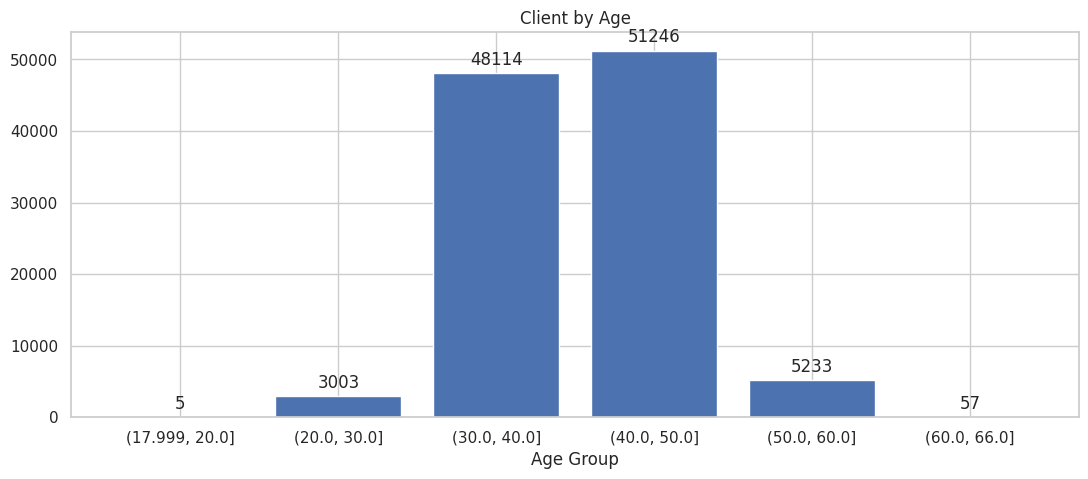

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(figsize=(13,5))

# Then, we draw charts on the axis.
# For label, you typically store the axes on a variable and refer it later
ax1 = ax.bar(client_age.index, client_age['age_group'])

# We can set many attribute of the axes, including title & legend
ax.bar_label(ax1, padding=3)
ax.set_title('Client by Age')
ax.set_xlabel('Age Group')

# Then we end the chart by showing the figure
fig.show()

Insight

Customers with the largest age group are in the **30-50 range** while customers with the age range of **18-20 are the least**.

### GENDER

In [ ]:
cust_gender= df_eda.groupby('FLAG_FEMALE')['ACCOUNT_ID'].count() #Count the id as users and group it by the loan status
cust_gender = cust_gender.reset_index()   #Reset the index to make it into a pandas dataframe
cust_gender

,FLAG_FEMALE,ACCOUNT_ID
0,0,44623
1,1,63035


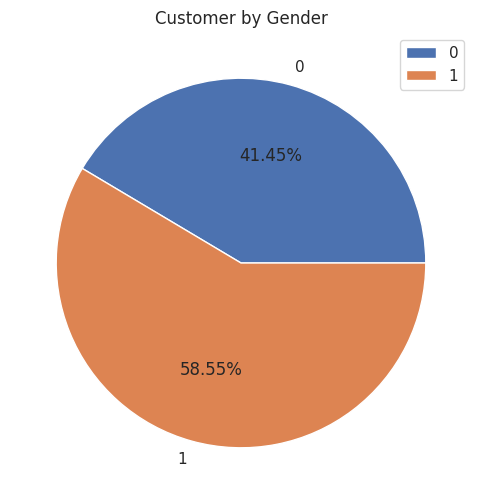

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(figsize=(6,6))
# Then, we draw charts on the axis.
ax.pie(cust_gender['ACCOUNT_ID'], labels = cust_gender['FLAG_FEMALE'], autopct='%.2f%%')
# We can set many attribute of the axes, including title & legend
ax.set_title('Customer by Gender')
ax.legend()
# Then we end the chart by showing the figure
fig.show()

**Insight :**
* Most RevoShop user are dominated with female with percentage of 58.55% from total user
* And male user with percetage of 41.45%
* It is showing that female make more transaction in the REVOSHOP than male customers

### MOB

In [ ]:
df_eda['MOB'].value_counts()

130    5563
129    4820
126    4708
128    4119
125    3668
       ... 
21        1
173       1
169       1
189       1
164       1
Name: MOB, Length: 175, dtype: int64

In [ ]:
df_eda['MOB'].groupby(df_eda['FLAG_FEMALE']).describe()

,count,mean,std,min,25%,50%,75%,max
FLAG_FEMALE,,,,,,,,
0,44623.000,101.044,25.451,21.000,81.000,105.000,125.000,278.000
1,63035.000,101.318,25.786,28.000,80.000,105.000,125.000,570.000


In [ ]:
#Count the user based on the region
df_mob = df_eda.groupby(['FLAG_FEMALE'])['MOB'].count()
df_mob= df_mob.reset_index()
df_mob

,FLAG_FEMALE,MOB
0,0,44623
1,1,63035


In [ ]:
#Count the user based on the region
df_mob = df_eda.groupby(['MOB'])['ACCOUNT_ID'].count()
df_mob= df_mob.reset_index()
df_mob

,MOB,ACCOUNT_ID
0,21,1
1,24,4
2,25,3
3,28,2
4,29,17
...,...,...
170,282,6
171,283,1
172,289,5
173,290,1


Insight :
- The most frequent MOB is 130 months (approximately 10 years) with 5.56% and dominated with Female User (63035)

# Sales in the past 6 month

#### RevoShop Total Sales over the past 6 months

In [ ]:
#add new total_sales column
df_eda['TOTAL_SALES_L6M'] = np.round(df_eda['AVG_TXN_AMT_L6M']* df_eda['TXN_CNT_L6M'],2)

#total_sales in the past 6 months
total_sales_L6M = np.round(df_eda['TOTAL_SALES_L6M'],2).sum()
print('Total Sales over the past 6 months =',total_sales_L6M)

Total Sales over the past 6 months = 56639218.9


In [ ]:
# Calculate total sales for each customer in the past 6 months
df_eda['TOTAL_SALES_L6M'] = df_eda['AVG_TXN_AMT_L6M'] * df_eda['TXN_CNT_L6M']

# Sum up the total sales for all customers
total_sales_six_months = df_eda['TOTAL_SALES_L6M'].sum()

# Calculate total sales from promo transactions in the past 6 months
total_promo_sales_six_months = df_eda['AVG_PROMO_TXN_AMT_L6M'] * df_eda['PROMO_TXN_CNT_L6M']

# Sum up the total promo sales for all customers
total_promo_sales_six_months = total_promo_sales_six_months.sum()

# Calculate total non-promo sales for the past 6 months
total_non_promo_sales_six_months = total_sales_six_months - total_promo_sales_six_months

# Create a DataFrame to store the total sales information
sales_summary_df = pd.DataFrame({
    'Category': ['Total Sales (Past 6 Months)', 'Total Promo Sales (Past 6 Months)', 'Total Non-Promo Sales (Past 6 Months)'],
    'Amount (Euro)': [total_sales_six_months, total_promo_sales_six_months, total_non_promo_sales_six_months]
})

# Display the table
display(sales_summary_df)

,Category,Amount (Euro)
0,Total Sales (Past 6 Months),56639218.900
1,Total Promo Sales (Past 6 Months),35208915.900
2,Total Non-Promo Sales (Past 6 Months),21430303.000


Insight
The total sales in the past 6 months is 56639218.9 euro

Here we are using pie chart

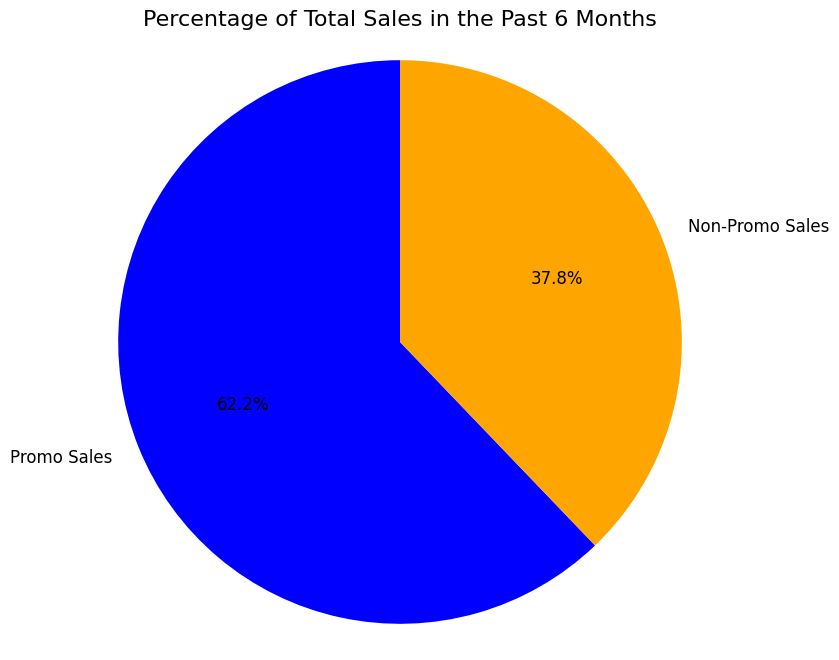

In [ ]:
# Create a list of labels for the pie chart
labels = ['Promo Sales', 'Non-Promo Sales']

# Create a list of values for the pie chart
values = [total_promo_sales_six_months, total_non_promo_sales_six_months]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'], textprops={'fontsize': 12})
plt.title("Percentage of Total Sales in the Past 6 Months", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

## Sales Promo in the past 6 months

In [ ]:
#add new total_sales column
df_eda['TOTAL_PROMO_SALES_L6M'] = np.round(df_eda['AVG_PROMO_TXN_AMT_L6M'] * df_eda['PROMO_TXN_CNT_L6M'],2)

#Calculate Total Sales promo in the past 6 months
total_sales_promo_L6M = np.round(df_eda['TOTAL_PROMO_SALES_L6M'],2).sum()
print('Total Sales Promo L6M is', total_sales_promo_L6M)

Total Sales Promo L6M is 35208915.9


# Sales Lifetime

## Total Sales in Lifetime

In [ ]:
#add new total_sales column
df_eda['TOTAL_SALES_LTM'] = np.round(df_eda['AVG_TXN_AMT_LTM']* df_eda['TXN_CNT_LTM'],2)

#total_sales in the lifetime
total_sales_LTM = np.round(df_eda['TOTAL_SALES_LTM'],2).sum()
print('Total Sales in the lifetime =',total_sales_LTM)

Total Sales in the lifetime = 221645038.1


Insight

Total Sales in the lifetime is 221645038.1

## Total Sales Promo Lifetime

In [ ]:
#add new total_sales column
df_eda['TOTAL_PROMO_SALES_LTM'] = np.round(df_eda['AVG_PROMO_TXN_AMT_LTM'] * df_eda['PROMO_TXN_CNT_LTM'],2)

#Calculate Total Sales promo in the past 6 months
total_sales_promo_LTM = np.round(df_eda['TOTAL_PROMO_SALES_LTM'],2).sum()
print('Total Sales Promo LTM is', total_sales_promo_LTM)

Total Sales Promo LTM is 130506103.99999997


#Percentage of Total Sales

#####E. Percentage of total sales at RevoShop is attributed to the promo in the past 6 months and lifetime

In [ ]:
# Calculate the percentage of total sales attributed to the promo for the past 6 months
total_sales_promo_L6M = (df_eda['AVG_PROMO_TXN_AMT_L6M'] * df_eda['PROMO_TXN_CNT_L6M']).sum()

# Total sales revenue from part c
total_sales_revenue = (df_eda['AVG_TXN_AMT_L6M'] * df_eda['TXN_CNT_L6M']).sum()

# Calculate the percentage of total sales attributed to the promo over the past 6 months
percentage_total_sales_promo_L6M = np.round((total_sales_promo_L6M / total_sales_revenue) * 100,2)

print("Percentage of total sales at RevoShop attributed to the promo in the past 6 months:", percentage_total_sales_promo_L6M)

# Repeat the calculation for lifetime sales

# Calculate the percentage of total sales attributed to the promo for lifetime
percentage_total_sales_promo_LTM = np.round((total_sales_promo_LTM / total_sales_LTM) * 100,2)

print("Percentage of total sales at RevoShop attributed to the promo for lifetime:", percentage_total_sales_promo_LTM)


Percentage of total sales at RevoShop attributed to the promo in the past 6 months: 62.16
Percentage of total sales at RevoShop attributed to the promo for lifetime: 58.88


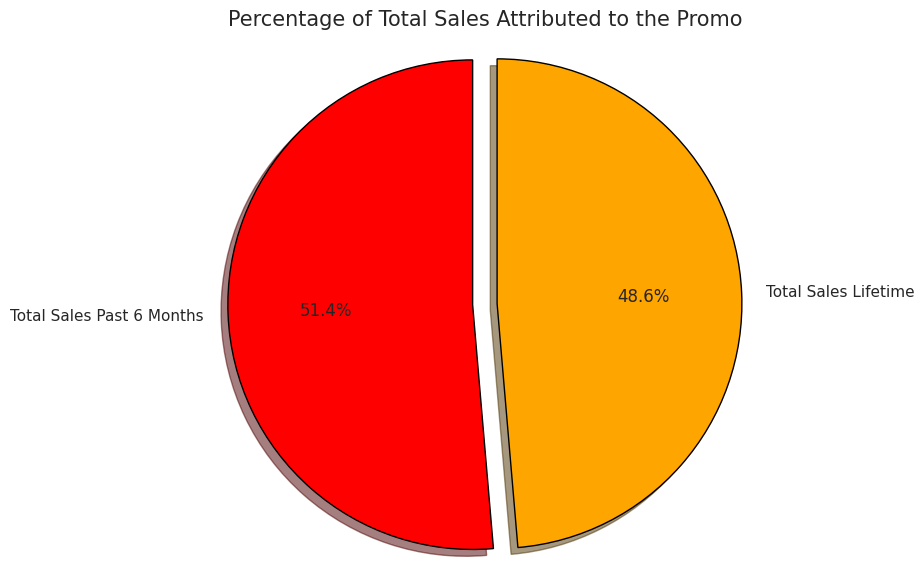

In [ ]:
# Data for visualization
labels = ['Total Sales Past 6 Months', 'Total Sales Lifetime']
sizes = [percentage_total_sales_promo_L6M*100, percentage_total_sales_promo_LTM*100]
colors = ['red', 'orange']
wp={'linewidth':1, 'edgecolor': 'black'}
explode = (0.1, 0)  # Explode the first slice (Past 6 Months) to highlight it

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, wedgeprops=wp)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Percentage of Total Sales Attributed to the Promo', fontsize=15)
plt.tight_layout()

# Display the plot
plt.show()

### Average Number in Transaction

In [ ]:
# Calculate the sum of transactions for the past 6 months
sum_transactions_last_6_months = df_eda['TXN_CNT_L6M'].sum()

# Calculate the sum of lifetime transactions
sum_transactions_lifetime = df_eda['TXN_CNT_LTM'].sum()

# Calculate the average number of transactions per customer for the past 6 months
avg_num_txn_l6m = sum_transactions_last_6_months / total_customer

# Calculate the average number of transactions per customer for their lifetime
avg_num_txn_ltm = sum_transactions_lifetime / total_customer

# Print the results
print("Average number of transactions per customer in the last 6 months:", avg_num_txn_l6m)
print("Average number of transactions per customer in their lifetime:", avg_num_txn_ltm)


Average number of transactions per customer in the last 6 months: 4.524484943060432
Average number of transactions per customer in their lifetime: 20.158074643779376


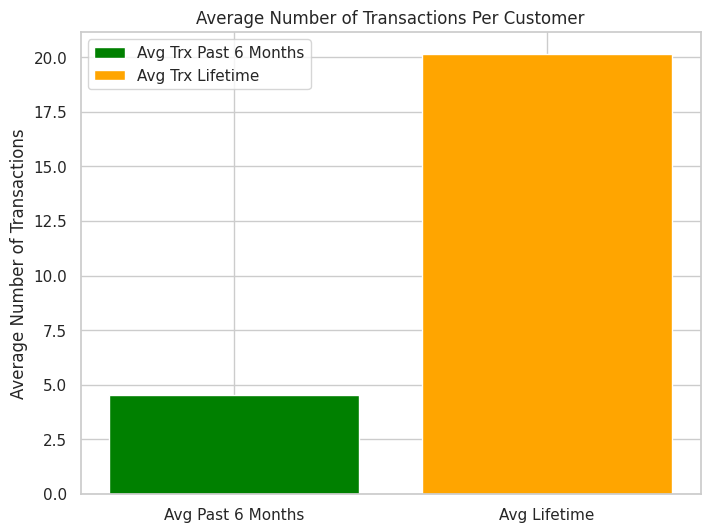

In [ ]:
# Plotting the results
fig, ax = plt.subplots(figsize=(8, 6))

# Bar plot for the average number of transactions in the past 6 months
ax.bar("Avg Past 6 Months", avg_num_txn_l6m, color='green', label='Avg Trx Past 6 Months')
# Bar plot for the average number of transactions in their lifetime
ax.bar("Avg Lifetime", avg_num_txn_ltm, color='orange', label='Avg Trx Lifetime')

# Add labels, title, and legend
ax.set_ylabel("Average Number of Transactions")
ax.set_title("Average Number of Transactions Per Customer")
ax.legend()

# Show the plot
plt.show()

Insight:

* Average number of transactions per customer in their lifetime: 20.158074643779376
* Average number of transactions per customer in the last 6 months: 4.524484943060432

### Total Cost of the promotion Over the past 6 months

In [ ]:
# Total cost of the promotion over the past 6 months
total_promo_cost_l6m = (df_eda['PROMO_TXN_CNT_L6M'] * 1.5).sum()
print("Total cost of the promotion over the past 6 months:", total_promo_cost_l6m)

Total cost of the promotion over the past 6 months: 456100.5


Insight:

The total cost promo in the past 6 months is 456100.5 euro


## Total Revenue

In [ ]:
# Total revenue generated by the promo in the past 6 months
total_promo_revenue_l6m =(df_eda['TOTAL_PROMO_SALES_L6M']*0.024).sum()
print("Total revenue generated by the promo in the past 6 months:", total_promo_revenue_l6m)

Total revenue generated by the promo in the past 6 months: 845013.9815999999


In [ ]:
# Total revenue generated by the promo in the past 6 months
total_sales_revenue = (df_eda['AVG_TXN_AMT_L6M'] * df_eda['TXN_CNT_L6M']).sum()
total_revenue_promo = total_sales_revenue * 0.024
print("Total revenue generated by the promo in the past 6 months:", total_revenue_promo)

Total revenue generated by the promo in the past 6 months: 1359341.2536


The total revenue in the past 6 months is 845.013.981 euro

## Promo Sensitive in the past 6 months

In [ ]:
# Calculate the percentage of total sales attributed to the promo for each customer
df_eda['PROMO_SENSITIVE_L6M'] = (df_eda['TOTAL_PROMO_SALES_L6M'] / df_eda['TOTAL_SALES_L6M']) * 100

# Sort the customers based on their percentage of total sales attributed to the promo
sorted_customers = df_eda.sort_values(by='PROMO_SENSITIVE_L6M', ascending=False)

# Select promo-sensitive and non-promo-sensitive customers
promo_sensitive_customers_l6m = sorted_customers[sorted_customers['PROMO_SENSITIVE_L6M'] > 50]
non_promo_sensitive_customers_l6m = sorted_customers[sorted_customers['PROMO_SENSITIVE_L6M'] <= 50]

# Print the number of promo-sensitive and non-promo-sensitive customers
print("Number of promo-sensitive customers in the past 6 months:", promo_sensitive_customers_l6m.shape[0])
print("Number of non-promo-sensitive customers in the past 6 months:", non_promo_sensitive_customers_l6m.shape[0])

Number of promo-sensitive customers in the past 6 months: 72091
Number of non-promo-sensitive customers in the past 6 months: 35567


Promo Sensitive Over the Tenure/Lifetime

In [ ]:
# Calculate the percentage of total sales attributed to the promo for each customer
df_eda['PROMO_SENSITIVE_LTM'] = (df_eda['TOTAL_PROMO_SALES_LTM'] / df_eda['TOTAL_SALES_LTM']) * 100

# Sort the customers based on their percentage of total sales attributed to the promo
sorted_customers = df_eda.sort_values(by='PROMO_SENSITIVE_LTM', ascending=False)

# Select promo-sensitive and non-promo-sensitive customers
promo_sensitive_customers_ltm = sorted_customers[sorted_customers['PROMO_SENSITIVE_LTM'] > 50]
non_promo_sensitive_customers_ltm = sorted_customers[sorted_customers['PROMO_SENSITIVE_LTM'] <= 50]

# Print the number of promo-sensitive and non-promo-sensitive customers
print("Number of promo-sensitive customers over the lifetime:", promo_sensitive_customers_ltm.shape[0])
print("Number of non-promo-sensitive customers over the lifetime:", non_promo_sensitive_customers_ltm.shape[0])

Number of promo-sensitive customers over the lifetime: 73461
Number of non-promo-sensitive customers over the lifetime: 34197


In [ ]:
# Calculate the percentage of total sales attributed to the promo for each customer
df_eda['PROMO_SENSITIVE_TOTAL'] = (df_eda['PROMO_SENSITIVE_LTM'] + df_eda['PROMO_SENSITIVE_L6M'])

# Sort the customers based on their percentage of total sales attributed to the promo
sorted_customers = df_eda.sort_values(by='PROMO_SENSITIVE_TOTAL', ascending=False)

# Select promo-sensitive and non-promo-sensitive customers
promo_sensitive_customers_sum = sorted_customers[sorted_customers['PROMO_SENSITIVE_TOTAL'] > 50]
non_promo_sensitive_customers_sum = sorted_customers[sorted_customers['PROMO_SENSITIVE_TOTAL'] <= 50]

# Print the number of promo-sensitive and non-promo-sensitive customers
print("Number of promo-sensitive customers over the lifetime:", promo_sensitive_customers_sum.shape[0])
print("Number of non-promo-sensitive customers over the lifetime:", non_promo_sensitive_customers_sum.shape[0])

Number of promo-sensitive customers over the lifetime: 106328
Number of non-promo-sensitive customers over the lifetime: 1330


# Trend Analysis


1. Is there any difference in transaction behaviour and promo sensitivity in the past 6 months?


In [ ]:
# Filter the data for active and inactive customers
active_customers = df_eda[df_eda['MAPP_ACTIVE_GROUP'] == 'X']
inactive_customers = df_eda[df_eda['MAPP_ACTIVE_GROUP'] != 'X']

# Calculate metrics for active customers
total_active_customers = active_customers['ACCOUNT_ID'].count()
promo_sensitive_active_customers = active_customers['PROMO_SENSITIVE_L6M'].sum()
avg_txn_amt_l6m_active = active_customers['AVG_TXN_AMT_L6M'].mean()
avg_txn_cnt_l6m_active = active_customers['TXN_CNT_L6M'].mean()

# Calculate metrics for inactive customers
total_inactive_customers = inactive_customers['ACCOUNT_ID'].count()
promo_sensitive_inactive_customers = inactive_customers['PROMO_SENSITIVE_L6M'].sum()
avg_txn_amt_l6m_inactive = inactive_customers['AVG_TXN_AMT_L6M'].mean()
avg_txn_cnt_l6m_inactive = inactive_customers['TXN_CNT_L6M'].mean()

# Print the results
print("Transaction behavior and promo sensitivity for active customers:")
print("Total active customers:", total_active_customers)
print("Promo-sensitive active customers:", promo_sensitive_active_customers)
print("Average transaction amount (active):", avg_txn_amt_l6m_active)
print("Average transaction count (active):", avg_txn_cnt_l6m_active)

print("\nTransaction behavior and promo sensitivity for inactive customers:")
print("Total inactive customers:", total_inactive_customers)
print("Promo-sensitive inactive customers:", promo_sensitive_inactive_customers)
print("Average transaction amount (inactive):", avg_txn_amt_l6m_inactive)
print("Average transaction count (inactive):", avg_txn_cnt_l6m_inactive)

Transaction behavior and promo sensitivity for active customers:
Total active customers: 100141
Promo-sensitive active customers: 6353908.542068487
Average transaction amount (active): 126.64832386335266
Average transaction count (active): 4.540338123246223

Transaction behavior and promo sensitivity for inactive customers:
Total inactive customers: 7517
Promo-sensitive inactive customers: 481140.72728017246
Average transaction amount (inactive): 128.77742450445655
Average transaction count (inactive): 4.313289876280431


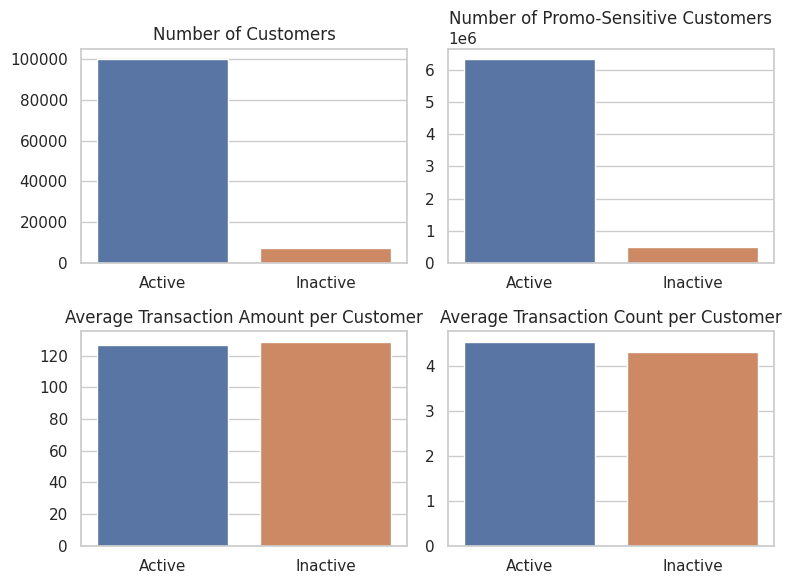

In [ ]:
# Data for active and inactive customers
active_num_customers = 100141
inactive_num_customers = 7517

active_num_promo_sensitive = 6353908
inactive_num_promo_sensitive = 481140

active_avg_txn_amt = 126.64832386335266
inactive_avg_txn_amt = 128.77742450445655

active_avg_txn_cnt = 4.540338123246223
inactive_avg_txn_cnt = 4.313289876280431

# Set the style for the plots
sns.set(style="whitegrid")

# Create a bar plot to compare active and inactive customer behavior
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
sns.barplot(x=["Active", "Inactive"], y=[active_num_customers, inactive_num_customers], ax=axes[0, 0])
axes[0, 0].set_title('Number of Customers', fontsize=12)
sns.barplot(x=["Active", "Inactive"], y=[active_num_promo_sensitive, inactive_num_promo_sensitive], ax=axes[0, 1])
axes[0, 1].set_title('Number of Promo-Sensitive Customers', fontsize=12)
sns.barplot(x=["Active", "Inactive"], y=[active_avg_txn_amt, inactive_avg_txn_amt], ax=axes[1, 0])
axes[1, 0].set_title('Average Transaction Amount per Customer', fontsize=12)
sns.barplot(x=["Active", "Inactive"], y=[active_avg_txn_cnt, inactive_avg_txn_cnt], ax=axes[1, 1])
axes[1, 1].set_title('Average Transaction Count per Customer', fontsize=12)
plt.tight_layout()
plt.show()

**Insight**

* The data clearly distinguished between active and inactive customers. RevoBank has 100.141 active clients, 6353908 of whom were promo-sensitive. In comparison, there were just 7517 inactive consumers, 481140 of whom were recognized as promo-sensitive. The majority of customers in both groups were promotionally responsive, emphasizing the importance of incentives in increasing customer involvement. The average transaction value for active clients was €126.68, which was slightly higher than the average for inactive customers. This shows that active customers are more likely to use their credit cards to make higher purchases. Inactive clients had a slightly higher average transaction count of around 4.31 transactions per customer, compared to 4.54 transactions for active customers. Despite being less engaged, idle customers purchase more frequently.



2. Is there any difference in transaction behaviour and promo sensitivity between high-value and lower-value in the past 6 months?

In [ ]:
# Group data by customer value group
cust_value_group = df_eda.groupby('CUST_VALUE_GROUP')

# Calculate metrics for each group
cust_value_group_count = cust_value_group.size()
promo_sensitive_cust_value_group = cust_value_group['PROMO_SENSITIVE_L6M'].sum()
avg_txn_amt_cust_value_group = cust_value_group['AVG_TXN_AMT_L6M'].mean()
avg_txn_cnt_cust_value_group = cust_value_group['TXN_CNT_L6M'].mean()

# Create a DataFrame to store the metrics
metrics_df_eda = pd.DataFrame({ 'Number of Customers': cust_value_group_count,'Number of Promo-Sensitive Customers': promo_sensitive_cust_value_group,
    'Average Transaction Amount': avg_txn_amt_cust_value_group, 'Average Transaction Count per Customer': avg_txn_cnt_cust_value_group})

# Print the DataFrame
print("Metrics for High-Value and Lower-Value Customers in the Past 6 Months:")
print(metrics_df_eda)

Metrics for High-Value and Lower-Value Customers in the Past 6 Months:
                  Number of Customers  Number of Promo-Sensitive Customers  \
CUST_VALUE_GROUP                                                             
A                               16389                          1084913.248   
B                               16997                          1088876.056   
C                               17734                          1124991.275   
D                               12001                           765219.996   
E                               44537                          2771048.694   

                  Average Transaction Amount  \
CUST_VALUE_GROUP                               
A                                    144.849   
B                                    130.904   
C                                    125.634   
D                                    126.450   
E                                    119.143   

                  Average Transaction Count p

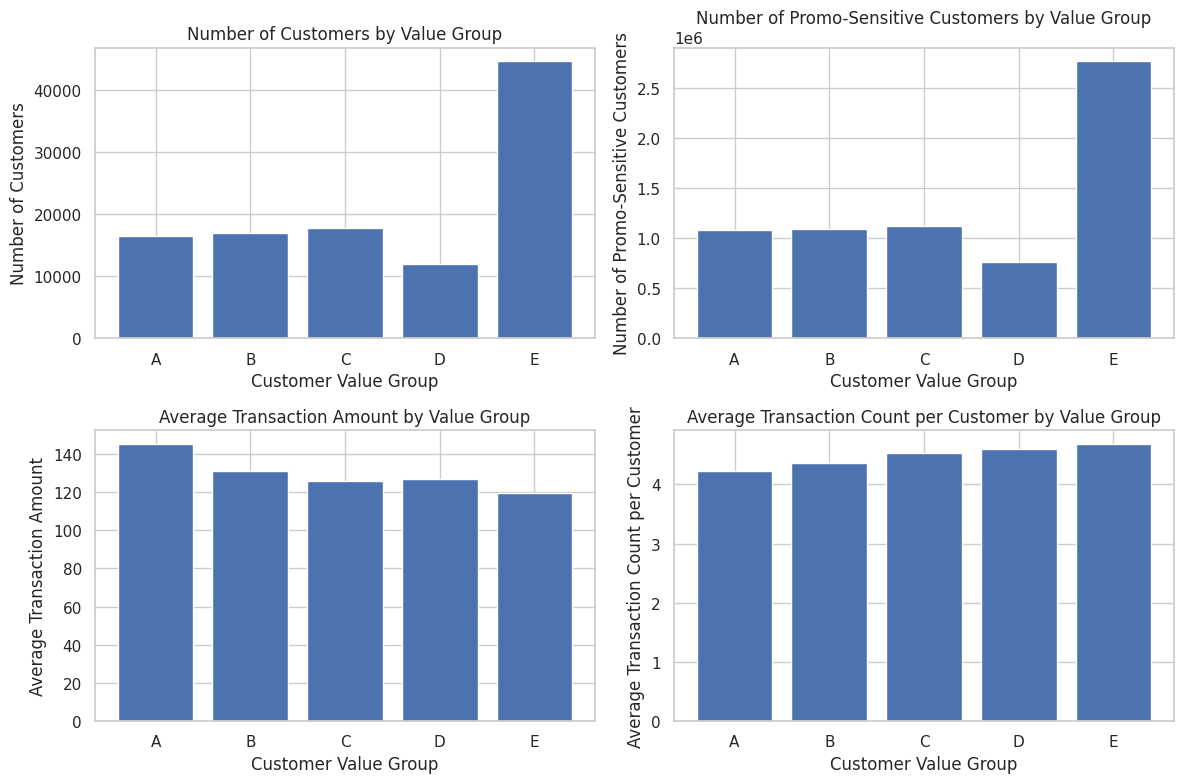

In [ ]:
# Create a bar plot to compare metrics between high-value and lower-value customers
plt.figure(figsize=(12, 8))

# Number of Customers
plt.subplot(2, 2, 1)
plt.bar(cust_value_group_count.index, cust_value_group_count.values)
plt.xlabel('Customer Value Group')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Value Group')

# Number of Promo-Sensitive Customers
plt.subplot(2, 2, 2)
plt.bar(promo_sensitive_cust_value_group.index, promo_sensitive_cust_value_group.values)
plt.xlabel('Customer Value Group')
plt.ylabel('Number of Promo-Sensitive Customers')
plt.title('Number of Promo-Sensitive Customers by Value Group')

# Average Transaction Amount
plt.subplot(2, 2, 3)
plt.bar(avg_txn_amt_cust_value_group.index, avg_txn_amt_cust_value_group.values)
plt.xlabel('Customer Value Group')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Value Group')

# Average Transaction Count per Customer
plt.subplot(2, 2, 4)
plt.bar(avg_txn_cnt_cust_value_group.index, avg_txn_cnt_cust_value_group.values)
plt.xlabel('Customer Value Group')
plt.ylabel('Average Transaction Count per Customer')
plt.title('Average Transaction Count per Customer by Value Group')

plt.tight_layout()
plt.show()

**Insight**

- Category E has the highest number of customers, followed by categories C and B. Category A has the lowest number of customers.
- Category E has the most promo-sensitive customers, while category A has the fewest.
- Category A has the highest average transaction amount, while category E has the lowest.
- The largest average number of transactions per customer is E (lowest customer) while A has the smallest avg number of transaction (most profitable and creditworthy.

3. Is there a relationship between increasing the number of email and SMS messages and improved sales performance?

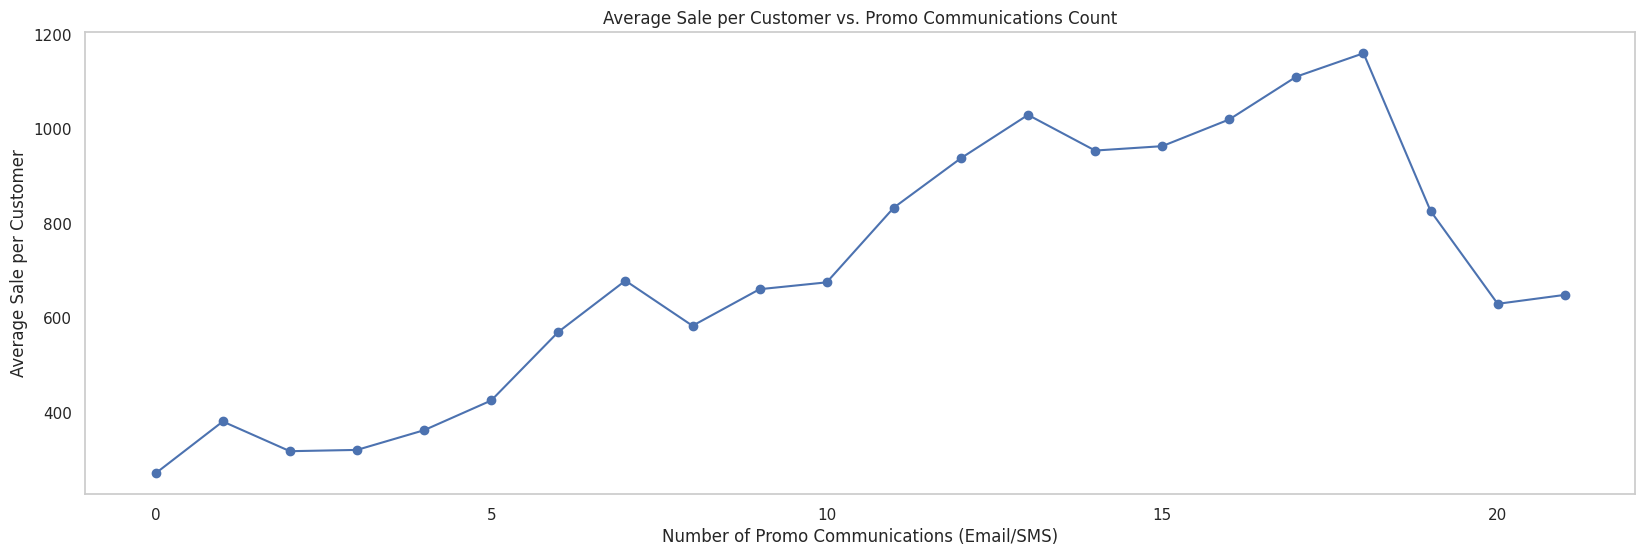

In [ ]:
communication_count = df_eda.groupby('CNT_PROMO_L6M')

# Calculate average sales per customer in each group
avg_sales_per_customer = communication_count['TOTAL_SALES_L6M'].mean()

# Create a line plot to visualize the relationship between promo communication count and average sale per customer
plt.figure(figsize=(20, 6))
plt.plot(avg_sales_per_customer.index, avg_sales_per_customer.values, marker='o', color='b')
plt.xlabel('Number of Promo Communications (Email/SMS)')
plt.ylabel('Average Sale per Customer')
plt.title('Average Sale per Customer vs. Promo Communications Count')
plt.grid()
plt.show()

**Insight**:
- The Average Sales Per Customer relatively increase as the number of promotional communication increase up to certain point (8, 13,and 18 communication promo). After reaching that point, average transaction and avg promo transaction generally decline with further increases in the number of promotional messages received.
- Customers who received 3-4 promotional messages has the relatively lower average sales because of lack promtional messages they received.

# Segmentation

## Data Preparation

In [ ]:
#Make a copy of the clean data for segmentation
df_segmentation = df_eda.copy()
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  object        
 1   MCC                    107658 non-null  object        
 2   MERCHANT_NAME          107658 non-null  object        
 3   AVG_TXN_AMT_L6M        107658 non-null  float64       
 4   AVG_TXN_AMT_LTM        107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 7   TXN_CNT_L6M            107658 non-null  float64       
 8   TXN_CNT_LTM            107658 non-null  float64       
 9   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 10  PROMO_TXN_CNT_LTM      107658 non-null  float64       
 11  LAST_TXN_DAY           107658 non-null  int64         
 12  CNT_PROMO_L6M          107658 non-null  floa

Here we want to create our cluster using these feature :
* Annual Income
* Loan Amount

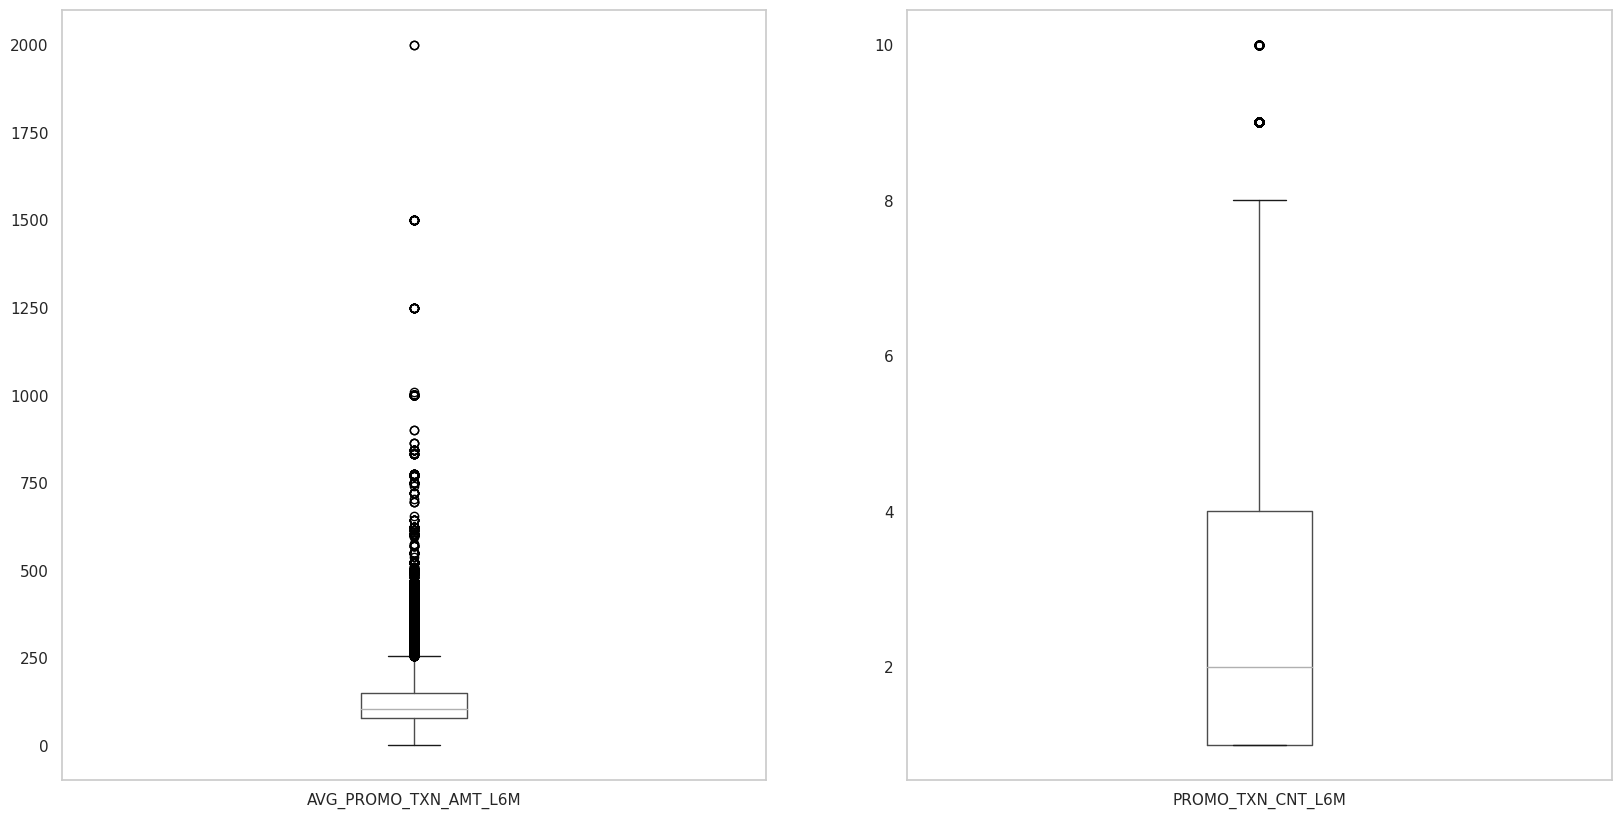

In [ ]:
# filter numeric column
feature = ['AVG_PROMO_TXN_AMT_L6M', 'PROMO_TXN_CNT_L6M']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

# for 0 (i) , Income (el)
for i,el in enumerate(feature):
    a = df_segmentation.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

### Libraries

In [ ]:
# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs    # Generate isotropic Gaussian blobs for clustering
from yellowbrick.cluster import SilhouetteVisualizer # Untuk melakukan analisis siluet untuk k-means clustering

####Preparing variables

In [ ]:
df_segmentation_feature = df_segmentation[['ACCOUNT_ID','AVG_PROMO_TXN_AMT_L6M', 'PROMO_TXN_CNT_L6M']]
df_segmentation_feature

,ACCOUNT_ID,AVG_PROMO_TXN_AMT_L6M,PROMO_TXN_CNT_L6M
0,100000004,200.000,2.000
1,100000008,140.000,2.000
2,100000012,400.000,2.000
3,100000014,242.900,6.000
4,100000015,97.500,4.000
...,...,...,...
112628,101059832,100.000,2.000
112629,101059843,120.000,1.000
112630,101059857,46.700,3.000
112631,101059860,190.000,2.000


##Check Data Distribution

###No Scale

<Axes: xlabel='PROMO_TXN_CNT_L6M', ylabel='AVG_PROMO_TXN_AMT_L6M'>

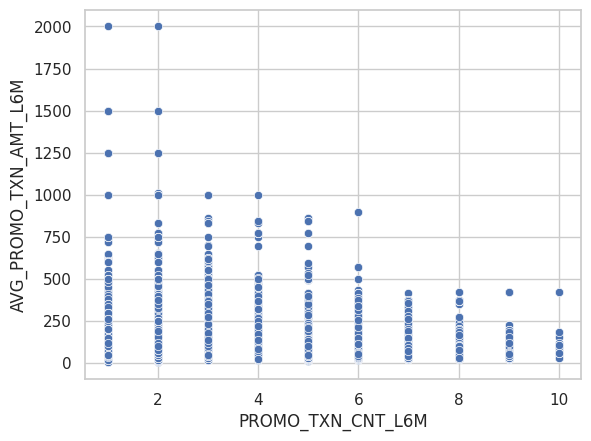

In [ ]:
sns.scatterplot(data = df_segmentation_feature, x='PROMO_TXN_CNT_L6M', y = 'AVG_PROMO_TXN_AMT_L6M')

### Standard Scaler

In [ ]:
# Define Standard Scale dataset
ss_scale_df = df_segmentation_feature.copy()
column = ['AVG_PROMO_TXN_AMT_L6M', 'PROMO_TXN_CNT_L6M']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

In [ ]:
ss_scale_df[['AVG_PROMO_TXN_AMT_L6M', 'PROMO_TXN_CNT_L6M']].head()

,AVG_PROMO_TXN_AMT_L6M,PROMO_TXN_CNT_L6M
0,0.924,-0.482
1,0.178,-0.482
2,3.413,-0.482
3,1.458,1.858
4,-0.351,0.688


<Axes: xlabel='PROMO_TXN_CNT_L6M', ylabel='AVG_PROMO_TXN_AMT_L6M'>

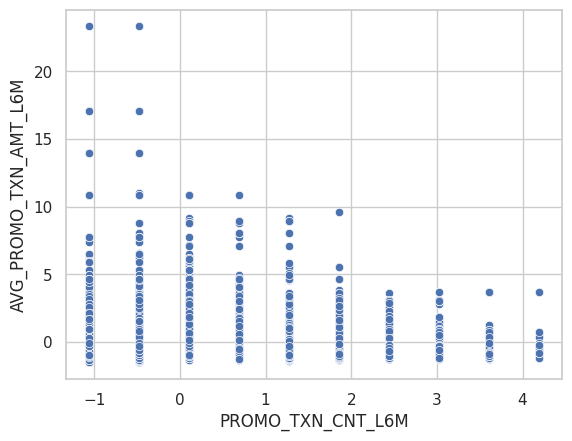

In [ ]:
sns.scatterplot (data = ss_scale_df, y='AVG_PROMO_TXN_AMT_L6M', x='PROMO_TXN_CNT_L6M')

### Robust Scaler

In [ ]:
# Define Robust Scale dataset
rs_scale_df = df_segmentation_feature.copy()
column = df_segmentation_feature.columns.to_list()
# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['AVG_PROMO_TXN_AMT_L6M', 'PROMO_TXN_CNT_L6M']] = rs_scaler.fit_transform(rs_scale_df[['AVG_PROMO_TXN_AMT_L6M', 'PROMO_TXN_CNT_L6M']])

<Axes: xlabel='PROMO_TXN_CNT_L6M', ylabel='AVG_PROMO_TXN_AMT_L6M'>

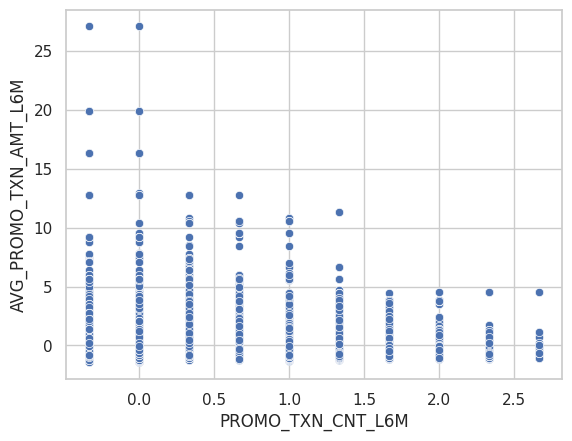

In [ ]:
sns.scatterplot (data = rs_scale_df, y='AVG_PROMO_TXN_AMT_L6M', x='PROMO_TXN_CNT_L6M')

### MinMax Scaler

In [ ]:
# Define Minmax Scale dataset
mm_scale_df = df_segmentation_feature.copy()
column = df_segmentation_feature.columns.to_list()
# using Minmax Scaler
mm_scaler = MinMaxScaler()
mm_scale_df[['AVG_PROMO_TXN_AMT_L6M', 'PROMO_TXN_CNT_L6M']] = mm_scaler.fit_transform(mm_scale_df[['AVG_PROMO_TXN_AMT_L6M', 'PROMO_TXN_CNT_L6M']])

<Axes: xlabel='PROMO_TXN_CNT_L6M', ylabel='AVG_PROMO_TXN_AMT_L6M'>

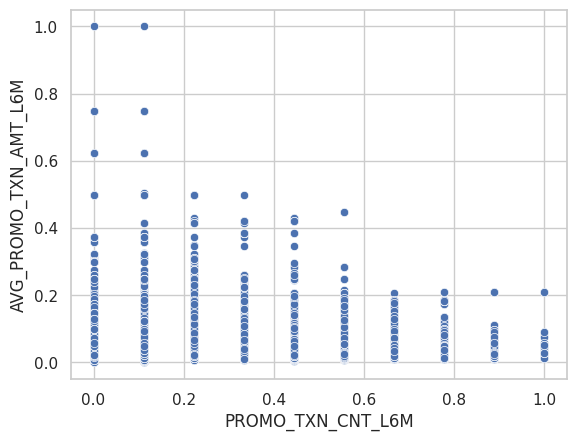

In [ ]:
sns.scatterplot (data = mm_scale_df, y='AVG_PROMO_TXN_AMT_L6M', x='PROMO_TXN_CNT_L6M')

##Clustering

###Elbow Method

In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 1000, init='k-means++')
    kmeanModel.fit(ss_scale_df)  #---------------------Ini yang diganti
    distortions.append(kmeanModel.inertia_)
distortions

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[1.00767389741155e+16,
 2522211813909261.0,
 1120666942901852.0,
 629318017466665.0,
 401953350439651.6,
 279610114813752.75,
 205859300683261.25,
 158148134751796.94,
 124698584876403.92,
 99030564899411.81]

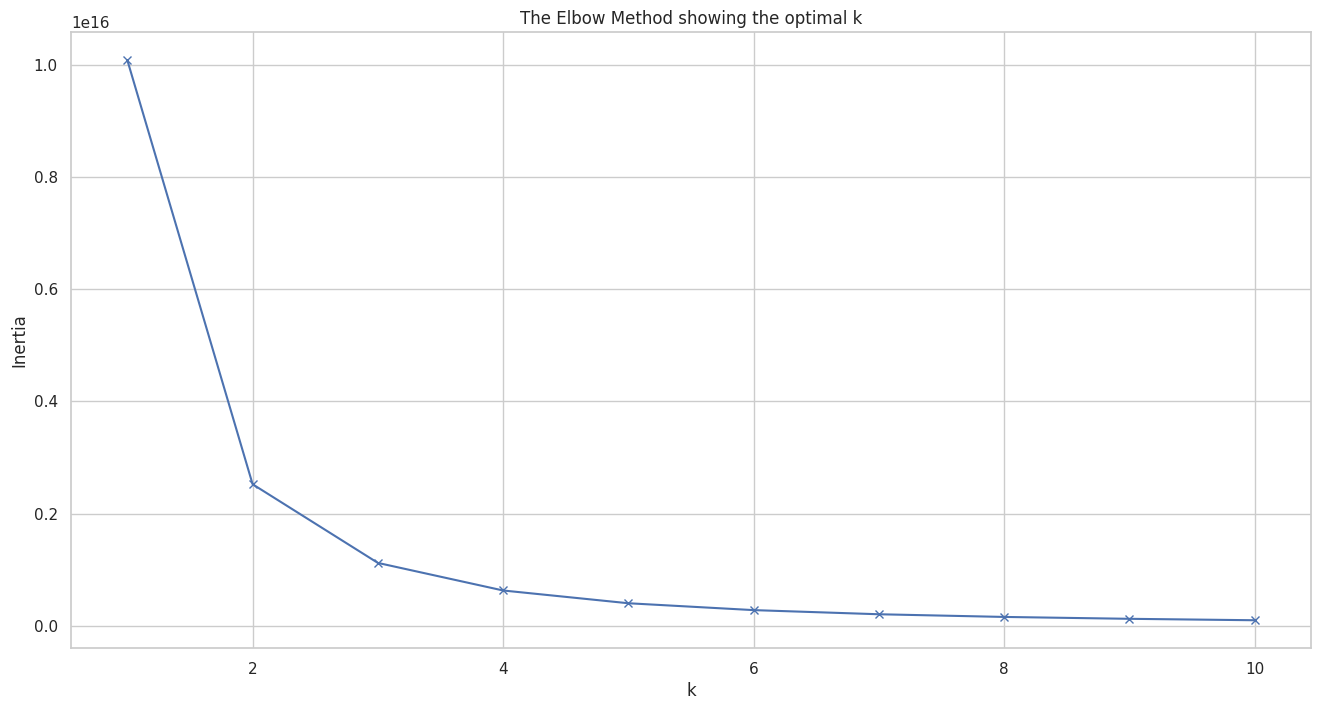

[1.00767389741155e+16, 2522211813909261.0, 1120666942901852.0, 629318017466665.0, 401953350439651.6, 279610114813752.75, 205859300683261.25, 158148134751796.94, 124698584876403.92, 99030564899411.81]


In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

Insight:

There are many potential elbows here: k=2 and k=3

To be more certain, we need also to look into the silhouette plot.

### Silhouette Analysis

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.4379760777955725


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.4705785523145728


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.45711439997955144


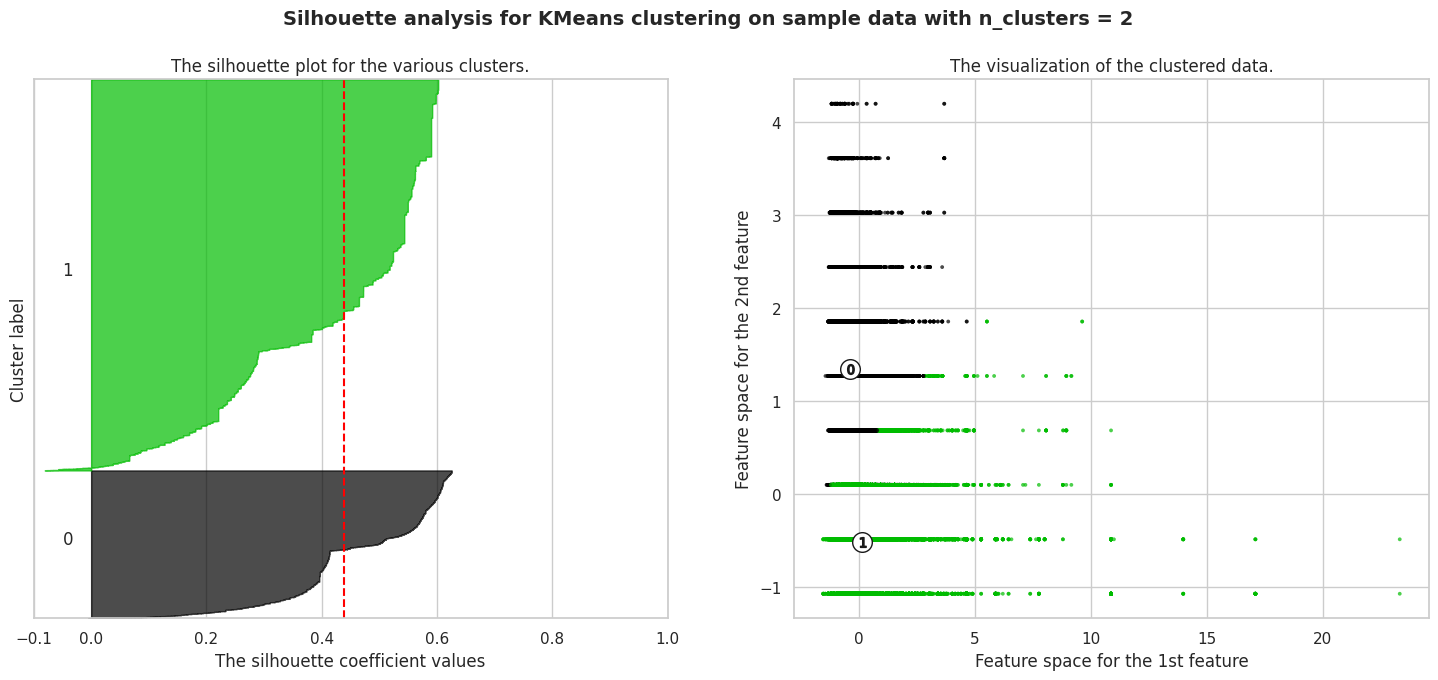

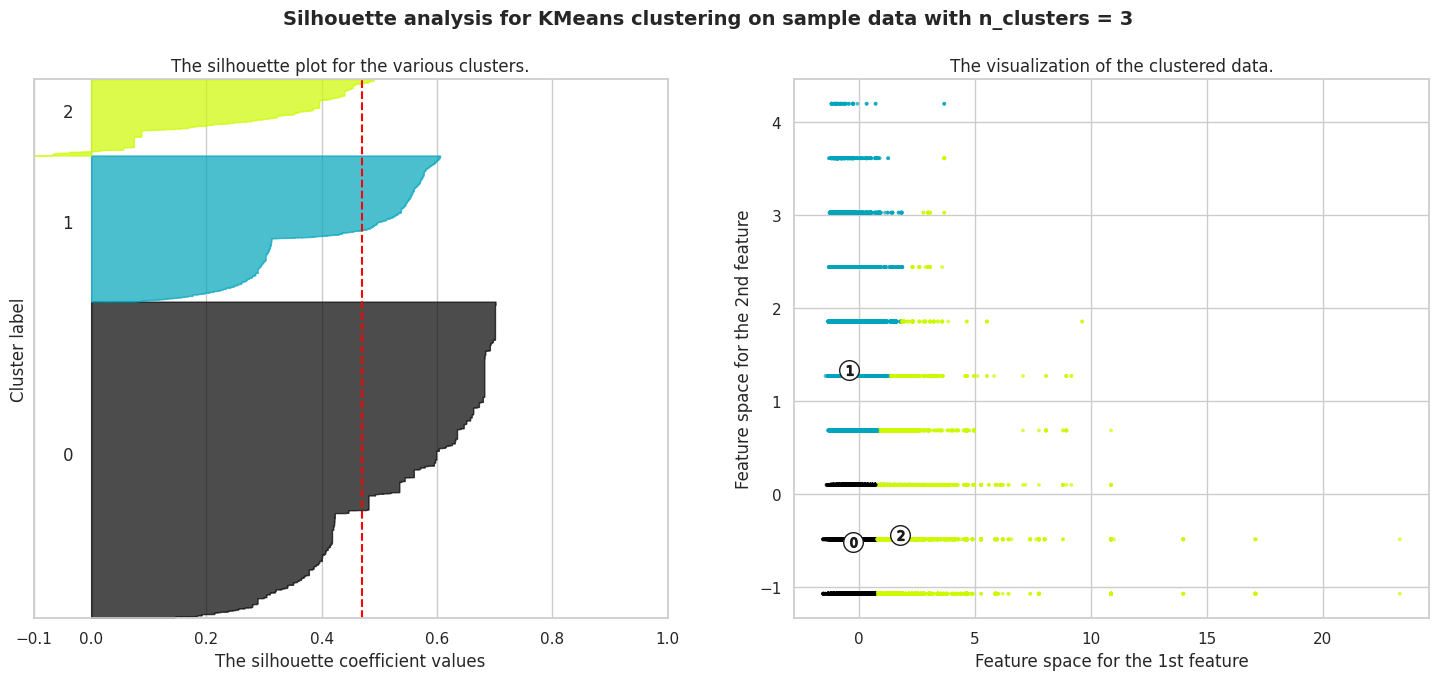

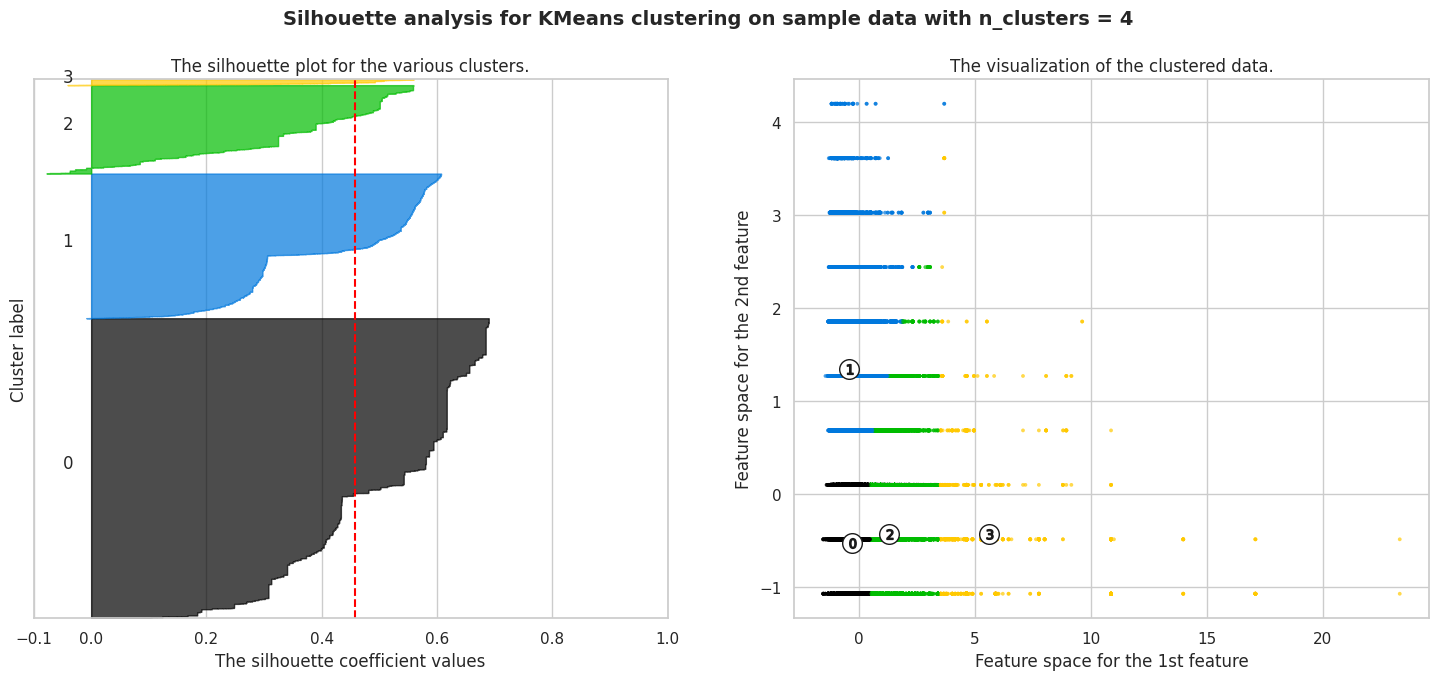

In [ ]:
silhoutte_analysis(ss_scale_df[['AVG_PROMO_TXN_AMT_L6M', 'PROMO_TXN_CNT_L6M']],list(range(2,5)))                   #------Tinggal ganti di variablenya dan rangenya

##Segmentation

With Standar Scaler

**Option 1 : Cluster 4**

In [ ]:
# make cluster
Cluster_4 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=4)   #------ Yang di ubah
cluster_model.fit_predict(Cluster_4[['AVG_PROMO_TXN_AMT_L6M', 'PROMO_TXN_CNT_L6M']])
Cluster_4['cluster'] = cluster_model.labels_
Cluster_4.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ACCOUNT_ID,AVG_PROMO_TXN_AMT_L6M,PROMO_TXN_CNT_L6M,cluster
0,100000004,0.924,-0.482,3
1,100000008,0.178,-0.482,1
2,100000012,3.413,-0.482,0
3,100000014,1.458,1.858,2
4,100000015,-0.351,0.688,2


<Axes: xlabel='cluster', ylabel='PROMO_TXN_CNT_L6M'>

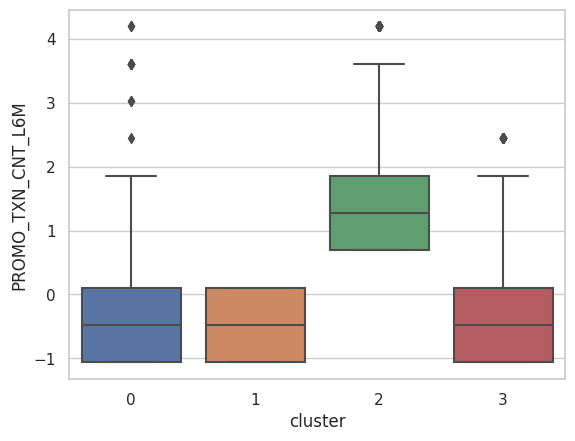

In [ ]:
# Number of transaction
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='PROMO_TXN_CNT_L6M')

<Axes: xlabel='cluster', ylabel='AVG_PROMO_TXN_AMT_L6M'>

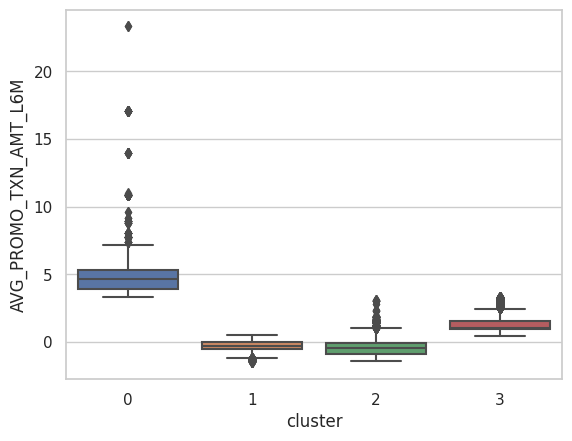

In [ ]:
# Number of transaction
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='AVG_PROMO_TXN_AMT_L6M')

**Option 2 : Cluster 3**

In [ ]:
# make cluster
Cluster_3 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=3)
cluster_model.fit_predict(Cluster_3[['AVG_PROMO_TXN_AMT_L6M', 'PROMO_TXN_CNT_L6M']])
Cluster_3['cluster'] = cluster_model.labels_
Cluster_3.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ACCOUNT_ID,AVG_PROMO_TXN_AMT_L6M,PROMO_TXN_CNT_L6M,cluster
0,100000004,0.924,-0.482,1
1,100000008,0.178,-0.482,0
2,100000012,3.413,-0.482,1
3,100000014,1.458,1.858,2
4,100000015,-0.351,0.688,2


<Axes: xlabel='cluster', ylabel='AVG_PROMO_TXN_AMT_L6M'>

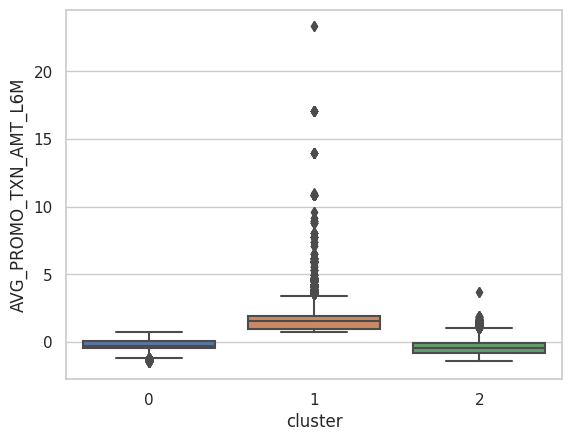

In [ ]:
# Number of transaction
sns.boxplot (data = Cluster_3 , x ='cluster' , y ='AVG_PROMO_TXN_AMT_L6M')

<Axes: xlabel='cluster', ylabel='PROMO_TXN_CNT_L6M'>

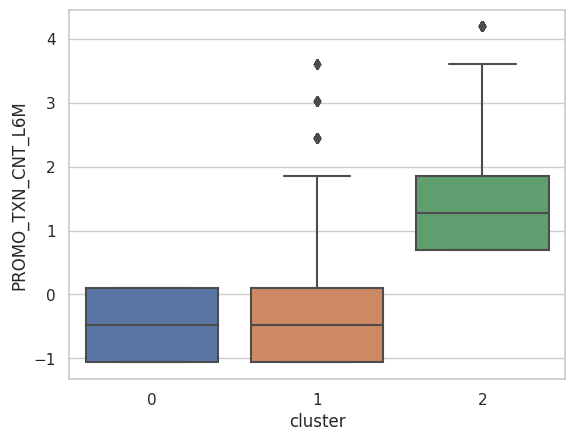

In [ ]:
# Number of transaction
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='PROMO_TXN_CNT_L6M')

##Merging Cluster with Dataset

In [ ]:
df_segmented = Cluster_3.merge(df_segmentation,how= 'inner', on = 'ACCOUNT_ID')
df_segmented

,ACCOUNT_ID,AVG_PROMO_TXN_AMT_L6M_x,PROMO_TXN_CNT_L6M_x,cluster,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M_y,AVG_PROMO_TXN_AMT_LTM,...,PROMO_CHANNEL,BIRTH_DATE,cust_age,age_group,TOTAL_SALES_L6M,TOTAL_PROMO_SALES_L6M,TOTAL_SALES_LTM,TOTAL_PROMO_SALES_LTM,PROMO_SENSITIVE_L6M,PROMO_SENSITIVE_LTM
0,100000004,0.924,-0.482,1,5262-MARKETPLACES,REVOSH MKTPLC,216.000,201.000,200.000,250.000,...,0,1975-12-17,48,"(40.0, 50.0]",1080.000,400.000,4221.000,1750.000,37.037,41.459
1,100000008,0.178,-0.482,0,5262-MARKETPLACES,REVOSH MKTPLC,143.300,114.100,140.000,150.000,...,0,1991-12-27,32,"(30.0, 40.0]",429.900,280.000,2510.200,1500.000,65.131,59.756
2,100000012,3.413,-0.482,1,5262-MARKETPLACES,REVOSH MKTPLC,263.300,242.700,400.000,290.000,...,0,1970-03-22,53,"(50.0, 60.0]",1053.200,800.000,2912.400,1160.000,75.959,39.830
3,100000014,1.458,1.858,2,5262-MARKETPLACES,REVOSH MKTPLC,235.600,210.000,242.900,300.000,...,1,1983-11-26,40,"(30.0, 40.0]",1884.800,1457.400,5670.000,3900.000,77.324,68.783
4,100000015,-0.351,0.688,2,5262-MARKETPLACES,REVOSH MKTPLC,98.000,77.500,97.500,90.000,...,0,1989-10-21,34,"(30.0, 40.0]",490.000,390.000,3410.000,1890.000,79.592,55.425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107653,101059832,-0.320,-0.482,0,5262-MARKETPLACES,REVOSHOP,100.000,84.200,100.000,100.000,...,1,1979-05-24,44,"(40.0, 50.0]",200.000,200.000,1010.400,500.000,100.000,49.485
107654,101059843,-0.071,-1.067,0,5262-MARKETPLACES,REVOSHOP,120.000,113.400,120.000,200.000,...,0,1993-07-14,30,"(20.0, 30.0]",360.000,120.000,2494.800,1000.000,33.333,40.083
107655,101059857,-0.983,0.103,0,5262-MARKETPLACES,REVOSHOP,52.900,36.800,46.700,70.000,...,1,1980-02-19,43,"(40.0, 50.0]",370.300,140.100,1030.400,840.000,37.834,81.522
107656,101059860,0.800,-0.482,1,5262-MARKETPLACES,REVOSHOP,195.000,147.300,190.000,200.000,...,0,1986-12-29,37,"(30.0, 40.0]",585.000,380.000,3387.900,2000.000,64.957,59.034


In [ ]:
df_segmented = Cluster_4.merge(df_segmentation,how= 'inner', on = 'ACCOUNT_ID')
df_segmented

,ACCOUNT_ID,AVG_PROMO_TXN_AMT_L6M_x,PROMO_TXN_CNT_L6M_x,cluster,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M_y,AVG_PROMO_TXN_AMT_LTM,...,PROMO_CHANNEL,BIRTH_DATE,cust_age,age_group,TOTAL_SALES_L6M,TOTAL_PROMO_SALES_L6M,TOTAL_SALES_LTM,TOTAL_PROMO_SALES_LTM,PROMO_SENSITIVE_L6M,PROMO_SENSITIVE_LTM
0,100000004,0.924,-0.482,1,5262-MARKETPLACES,REVOSH MKTPLC,216.000,201.000,200.000,250.000,...,0,1975-12-17,48,"(40.0, 50.0]",1080.000,400.000,4221.000,1750.000,37.037,41.459
1,100000008,0.178,-0.482,2,5262-MARKETPLACES,REVOSH MKTPLC,143.300,114.100,140.000,150.000,...,0,1991-12-27,32,"(30.0, 40.0]",429.900,280.000,2510.200,1500.000,65.131,59.756
2,100000012,3.413,-0.482,3,5262-MARKETPLACES,REVOSH MKTPLC,263.300,242.700,400.000,290.000,...,0,1970-03-22,53,"(50.0, 60.0]",1053.200,800.000,2912.400,1160.000,75.959,39.830
3,100000014,1.458,1.858,0,5262-MARKETPLACES,REVOSH MKTPLC,235.600,210.000,242.900,300.000,...,1,1983-11-26,40,"(30.0, 40.0]",1884.800,1457.400,5670.000,3900.000,77.324,68.783
4,100000015,-0.351,0.688,0,5262-MARKETPLACES,REVOSH MKTPLC,98.000,77.500,97.500,90.000,...,0,1989-10-21,34,"(30.0, 40.0]",490.000,390.000,3410.000,1890.000,79.592,55.425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107653,101059832,-0.320,-0.482,2,5262-MARKETPLACES,REVOSHOP,100.000,84.200,100.000,100.000,...,1,1979-05-24,44,"(40.0, 50.0]",200.000,200.000,1010.400,500.000,100.000,49.485
107654,101059843,-0.071,-1.067,2,5262-MARKETPLACES,REVOSHOP,120.000,113.400,120.000,200.000,...,0,1993-07-14,30,"(20.0, 30.0]",360.000,120.000,2494.800,1000.000,33.333,40.083
107655,101059857,-0.983,0.103,2,5262-MARKETPLACES,REVOSHOP,52.900,36.800,46.700,70.000,...,1,1980-02-19,43,"(40.0, 50.0]",370.300,140.100,1030.400,840.000,37.834,81.522
107656,101059860,0.800,-0.482,1,5262-MARKETPLACES,REVOSHOP,195.000,147.300,190.000,200.000,...,0,1986-12-29,37,"(30.0, 40.0]",585.000,380.000,3387.900,2000.000,64.957,59.034


##Visualize Cluster

For no we call our clusters as is, then we will create an interesting name for naming the cluster

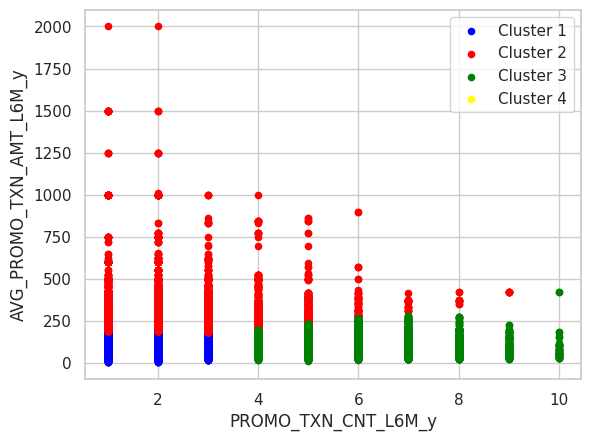

In [ ]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='PROMO_TXN_CNT_L6M_y', y='AVG_PROMO_TXN_AMT_L6M_y', c='blue', label='Cluster 1')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='PROMO_TXN_CNT_L6M_y', y='AVG_PROMO_TXN_AMT_L6M_y', c='red', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='PROMO_TXN_CNT_L6M_y', y='AVG_PROMO_TXN_AMT_L6M_y', c='green', label='Cluster 3', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 3].plot.scatter(x='PROMO_TXN_CNT_L6M_y', y='AVG_PROMO_TXN_AMT_L6M_y', c='yellow', label='Cluster 4', ax = cluster_scatter)

###Descriptive Statistic

In [ ]:
df_segmented.groupby('cluster',as_index = False)[['AVG_PROMO_TXN_AMT_L6M_y','PROMO_TXN_CNT_L6M_y']].agg(['count','mean','min','max','median']).T

cluster                                0         1         2
AVG_PROMO_TXN_AMT_L6M_y count  63248.000 15219.000 29191.000
                        mean     106.561   268.631    92.642
                        min        3.200   186.700    10.800
                        max      186.700  2000.000   422.200
                        median   100.000   250.000    88.300
PROMO_TXN_CNT_L6M_y     count  63248.000 15219.000 29191.000
                        mean       1.947     2.073     5.118
                        min        1.000     1.000     4.000
                        max        3.000     9.000    10.000
                        median     2.000     2.000     5.000

###Cluster Interpretation

To Check what can be analyzed

In [ ]:
pd.set_option('display.max_columns',None)
df_segmented.head(5)

Things can be analyzed :

* Average Promo in the Past 6 months
* Promo Transaction in the past 6 months
* Customer Group Value
* Mobile Active Group
* Homeownership Status
* Gender
* Total sales
* Total promo sales
* Percentage of promo sales
* Promo sensitive costumer in the past 6 months

####AVG_PROMO_TXN_AMT_L6M

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['AVG_PROMO_TXN_AMT_L6M_y'].mean()

,cluster,AVG_PROMO_TXN_AMT_L6M_y
0,0,106.561
1,1,268.631
2,2,92.642


Insight :
* 0 = Average annual income = 106.561
* 1 = Average annual income = 268.631 (Highest)

* 2 = Average annual income = 92.642 (Lowest)

The data is clustered into three groups. Cluster 1 has the highest mean of average promotional sales over the past 6 months, approximately 268.631, indicating customers who spend the most on promotions. Cluster 0 has a lower mean of about 106.561, while Cluster 2 has the lowest mean of about 92.642, representing customers who spend the least on promotions.

####PROMO_TXN_CNT_L6M

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['PROMO_TXN_CNT_L6M_y'].mean()

,cluster,PROMO_TXN_CNT_L6M_y
0,0,1.947
1,1,2.073
2,2,5.118


Insight :
* 0 = average of promo transaction = 1.947 (Lowest)
* 1 = average of promo transaction  = 2.073
* 2 = average of promo transaction  = 5.118 (Highest)

Cluster 0 has the lowest average of promo transaction with total 1.947. Cluster 1 has the middle average of promo transaction in the past 6 months with approximately 2.073, while Cluster 2 has the highest avg of promo transaction with total 5.118 and its represent the highest value customers.




####Customer Group Value

In [ ]:
df_segmented.groupby(['cluster','CUST_VALUE_GROUP'], as_index = False)['ACCOUNT_ID'].count()

,cluster,CUST_VALUE_GROUP,ACCOUNT_ID
0,0,A,9052
1,0,B,10263
2,0,C,10393
3,0,D,6794
4,0,E,26746
5,1,A,3451
6,1,B,2569
7,1,C,2470
8,1,D,1808
9,1,E,4921


Insight :
* 0 = D < A < B < C < E
* 1 = D < C < B < A < E
* 2 = D < A < B < C < E

Based on the result, it can concluded  that the three clusters show that group 'E' has a highest level of customer group value which means the most lowest customers. But cluster 1 has A (High-Value Customer) which means that it has most profitable and creditworthiness.

####Mobile App Activity

In [ ]:
df_segmented.groupby(['cluster','MAPP_ACTIVE_GROUP'], as_index = False)['ACCOUNT_ID'].count()

,cluster,MAPP_ACTIVE_GROUP,ACCOUNT_ID
0,0,X,58603
1,0,Y,4378
2,0,Z,267
3,1,X,14149
4,1,Y,986
5,1,Z,84
6,2,X,27389
7,2,Y,1672
8,2,Z,130


Insight:

*   Cluster 0 = X > Y > Z
*   Cluster 1 = X > Y > Z
*   Cluster 2 = X > Y > Z

All cluster has the highest level of activity in mobile app. Cluster 0 shows the highest number of high level activity customers with approximately 58603 customers.





####Homeownership Status

In [ ]:
df_segmented.groupby(['cluster','HOMEOWNER_STATUS'], as_index = False)['ACCOUNT_ID'].count()

,cluster,HOMEOWNER_STATUS,ACCOUNT_ID
0,0,0.000,29587
1,0,1.000,33661
2,1,0.000,6845
3,1,1.000,8374
4,2,0.000,14310
5,2,1.000,14881


Insight :
* 0 = home owner > otherwise,
* 1 = home owner > otherwise
* 2 = home owner > otherwise

In clusters 0, 1, and 2, home owner customers are significantly overrepresented compared to the otherwise.




#### Gender

In [ ]:
df_segmented.groupby(['cluster','FLAG_FEMALE'], as_index = False)['ACCOUNT_ID'].count()

,cluster,FLAG_FEMALE,ACCOUNT_ID
0,0,0,26181
1,0,1,37067
2,1,0,6942
3,1,1,8277
4,2,0,11500
5,2,1,17691


Insight :
* 0 = 0 < 1  
* 1 = 0 < 1
* 2 = 0 < 1

In All clusters 0, 1, and 2, female users are dominated compared to the male customers.

####Total Sales in the past 6 months

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['TOTAL_SALES_L6M'].mean()

,cluster,TOTAL_SALES_L6M
0,0,377.064
1,1,900.459
2,2,653.851


Insight:
- 0 : Average Total Sales in the past 6 months = 377.064 (lowest)
- 1 : Average Total Sales in the past 6 months = 900.469 (Highest)
- 2 : Average Total Sales in the past 6 months = 653.851

####Total promo sales in the past 6 months

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['TOTAL_PROMO_SALES_L6M'].mean()

,cluster,TOTAL_PROMO_SALES_L6M
0,0,205.727
1,1,562.230
2,2,467.286


Insight:
- 0 : Average Total Promo Sales in the past 6 months = 205.727 (lowest)
- 1 : Average Total Promo Sales in the past 6 months = 562.230
- 2 : Average Total Promo Sales in the past 6 months = 467.286 (Highest)

####Percentage of promo sales

In [ ]:
# 5: Calculate the percentage of total sales attributed to promo for each customer in the past 6 months
df_segmented['PCT_PROMO_SALES_L6M'] = (df_segmented['TOTAL_PROMO_SALES_L6M'] / df_segmented['TOTAL_SALES_L6M']) * 100

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['PCT_PROMO_SALES_L6M'].mean()

,cluster,PCT_PROMO_SALES_L6M
0,0,58.470
1,1,66.042
2,2,73.031


Insight:
- 0 = avg pct promo sales = 58.470 (lowest)
- 1 = avg pct promo sales = 66.042
- 2 = avg pct promo sales = 73.031 (highest)

####Promo sensitive costumer

In [ ]:
df_segmented.groupby(['cluster','PROMO_SENSITIVE_L6M'], as_index = False)['ACCOUNT_ID'].count().sort_values(['cluster','ACCOUNT_ID'])

,cluster,PROMO_SENSITIVE_L6M,ACCOUNT_ID
0,0,0,63248
1,1,0,15219
2,2,0,29191


Insight :
* 0 = Senior, Rookies, Mid-Level
* 1 = Senior, Mid-Level, Rookies
* 2 = Senior, Mid-Level, Rookies
* 3 = Senior, Mid-Level, Rookies